# Motor Vehicle Mayhem: Factors Leading to Severe Road Accidents

Ray Zhou, Ray Zhang, Alex Weiss, Steven Chen

---

## Introduction

**Context:** In the past 100 years, traffic fatalities have declined due to improvements in safety technology and better education in passenger cars. Yet according to a report by the NHTSA (National Highway Traffic Safety Administration) the number of traffic deaths in urban areas has increased.$^{1}$ New York, being the largest metropolitan area in the United States, experiences a substantial share of these accidents, which can be reduced through better regulation and development choices. We hope the analysis done here will shed more light upon the unspoken everyday tragedies on our streets.

In what follows, we will study the affects of a variety of accidents on traffic severity using MV-104-AN police report data from New York State. Some factors believed to change the severity of traffic accidents include: time of day, vehicles involved, and perhaps the borough that the accident is in. Conclusions can be drawn in both directions; for instance, there is no concrete, intuitive answer to whether more accidents occur at night or during the day. One might argue that more accidents occur during the day time because more cars are active, but it can also be argued that though there are less active cars at night, there is less visibility and a higher proportion of serious accidents may occur.
 
As data scientists, we aim to use a combination of statistical methods, data processes, and real world knowledge to create and maintain better models of predicting vehicular accidents, which claim the lives of hundreds daily in the US. At the same time, we want to acknowledge that there are dangers and limitations of data and modeling, and that there may be other factors outside the scope of our project that we have not explored that may greatly impact our results.

The **research question** that we are trying to answer is how do different accident conditions affect severity in terms of individuals killed/injured and vehicles involved? We will specifically be measuring the relationship betweeen the time of day and the individuals injured, the size of a borough and number of accidents in each respective borough (and whether the number of accidents and time of day in each borough is consistent), and the relationship between number of vehicles and individuals killed/injured.

In this work, our **main findings** after performing the analyses were that there was very little correlation between time of day on accident severity. While some boroughs have less accidents as a whole, the mean accident severity in each borough is roughly consistent. Additionally, the number of accidents for each borough binned by each hour is very similar to the number of injured binned by each hour. Our group observed that Brooklyn had the most amount of accidents depite the fact that it is the second largest borough. Our group observed that Queens had the second most amount of accidents despite the fact that it is the largest of the 5 boroughs. Our group observed that Manhattan has the third most amount of accidents depite the fact that it is the smallest of the 5 boroughs. Our group observed that Brooklyn had the most amount of accidents depite the fact that it is the second largest borough. The Bronx is the fourth largest borough and it has the fourth largest amount of accidents. Lastly, Staten Island has the least amount of accidents despite the fact that it is the third largest borough. From the observations above, our group determined that the size of the borough actually only has a very small effect on the number of accidents occuring in the borough. Out of the five boroughs, only the Bronx's size correlated with its ranking in terms of the number of accidents in the borough. We also determined that the number of vehicles also has a very minimal impact on accident severity, meaning that an accident with a lot of vehicles could result in a similar number of injured and killed as an accident with less vehicles.



In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
accidents = pd.read_csv('cleaned_accidents.csv')
# before cleaning dataset
#accidents = pd.read_csv('Motor_Vehicle_Collisions_-_Crashes.csv')

---

## Data Description

Motor vehicle collision data was downloaded from the NYC OpenData project interface. The observations are each individual accident, and the attributes are CRASH DATE, CRASH TIME, BOROUGH, ZIP CODE, LATITUDE, LONGITUDE, LOCATION, ON STREET NAME, CROSS STREET NAME, OFF STREET NAME, NUMBER OF PERSONS INJURED, NUMBER OF PERSONS KILLED, NUMBER OF PEDESTRIANS INJURED, NUMBER OF PEDESTRIANS KILLED, NUMBER OF CYCLIST INJURED, NUMBER OF CYCLIST KILLED, NUMBER OF MOTORIST INJURED, NUMBER OF MOTORIST KILLED, CONTRIBUTING FACTOR VEHICLE 1, CONTRIBUTING FACTOR VEHICLE 2, CONTRIBUTING FACTOR VEHICLE 3, CONTRIBUTING FACTOR VEHICLE 4, CONTRIBUTING FACTOR VEHICLE 5, COLLISION_ID, VEHICLE TYPE CODE 1, VEHICLE TYPE CODE 2, VEHICLE TYPE CODE 3, VEHICLE TYPE CODE 4, VEHICLE TYPE CODE 5. The website can be found [here](https://data.cityofnewyork.us/Public-Safety/Motor-Vehicle-Collisions-Crashes/h9gi-nx95). Data points originate from filed MV104-AN police reports, funded by New  York State taxpayer money for the purpose of documenting traffic incidents in New York State.

Processes that might have impacted data collection include geographical socioeconomic limitations (a poorer borough might not report accidents to police/insurance and would directly bring the vehicle to a shop), adaption of technology (while the MV104-AN form has stayed the same adaptations have been made to allow for reporting using paper vs on a digital medium, resulting in more or less data being reported after a certain year), and injury severity being a subjective measure that might have to deal with the backgrounds of individuals involved in each accident (an older individual might report that they are injured for financial compensation while a younger individual might not do as such).

Preprocessing was not done and the data is in the raw form as reported in the original MV104-AN police reports. We simply downloaded the entire dataset from the website listed above, with accients starting in 2014 (the form was slightly different before this date). People were actively involved in the collection of the data as they submitted the MV104-AN reports by themselves to their local police agencies. Since the dataset was of 1.76 million datapoints since 2012 with 29 factors, we can omit certain factors are less related to the research question. For now some important factors include time, borough, persons killed, and persons injured. The types of vehicles involved in an accident are also summarized in five columns, we will have to perform operations to generate another column to sum up the number of vehicles involved in each crash.


**View Appendix File to See Data Cleaning**

---

## Preregistered Analyses

### Train/test Split

#### Objective:
This is a significant test as we can see if subsets of the data hold with respect to the whole dataset. When we take subsets of accidents with respect to time, we can generate a rough accident severity model which we can apply to other parts of the data to determine whether they hold and are different from the general model of accident severity with respect to time.

### Bootstrap test

#### Objective:
This test will allow us to see the range of values that the number of people injured can take, allowing us to better apply our results from the research question beyond 2018 to a more general analysis of traffic data in NYC in a general year.
We can sample with replacement in to see if the patterns observed are robust. We can take samples per borough with replacement and see if time is an accurate predictor of the number of injuries within each individual borough to see if there are any statistical discrepancies in accident severity within each borough. This gives us a better comparison of the accuracy of predictions between boroughs.

### Linear Regression/Multivariable Linear Regression/OLS Regression

#### Objective:
We plan to conduct linear regression analysis between the time of day and the number of individuals injured to determine whether the accident severity between the five boroughs has a certain correlation. We also plan to conduct a multivariable linear regression between the time of day and number of injured in all five boroughs, to see whether the relation by borough impacts the linear regression of the boroughs combined. Finally, we will conduct an OLS 

#### Model:
$injured = m*minutes\_of\_day + b$

#### Hypothesis:
$ H_0: $ There is no correlation between the time of day and the number of injuries of an accident

### Association between boroughs and the frequency of traffic accidents

#### Objective:
This test will allow us to see if time in minutes is a reasonably accurate predictor of the probability of an above-average number of accidents occuring.

### Histogram with bins based on hours
Binning the hours together and seeing which hours contain the most amount of traffic accidents and the most severe accidents in terms of number of injuries.

#### Objective:

Through these graphs we will be able to analyze whether there is actually a relationship that exists between the time of day and the number of individuals injured/killed. 

One thing to note here is that by time of day we mean binning by each hour of the day.

For one bar graph, we plan on analyzing the relationship between the time of day and the number of accidents that occur in the five boroughs combined.

We also plan on creating bar graphs that are binned by 6 hour intervals that show the number of people killed for each of the boroughs.

In addition to the bar graph that shows the number of people killed binned by 6 hour intervals, we will also create the same bar graph but instead of people killed, we will be analyzing the number of people injured from car accidents. 

For the 6 hour interval bar graph, we will also create a graph that shows the relationship between time and the number of people killed/injured combining all of the 5 boroughs. This analysis will allow us to get a sense of whether this pattern that we have observed on the individual level of each level is consistent.

For each of the five boroughs, we plan on creating a separate bar graph that shows the relationship between the time of day and the number of accidents that occur in those boroughs.

For another bar graph, we plan on analyzing the relationship between the number of people injured in accidents in all of the boroughs combined against the different time of the day.

For another bar graph, we plan on analyzing the relationship between the number of people killed in accidents in all of the boroughs combined against the different time of the day.

### Plotting out the longitude and latitude of each accident
Through plotting out all of the accidents that our data contain about accidents in the year of 2018 in NYC, our group will analyze the density of the map to see which boroughs had more accidents and which has less accidents. We can then also use this data to see if there is a correlation between the size of the borough and the number of accidents that occur in these boroughs.

#### Objective:

For this our group plans on graphing all of the longitude and latitude points in a 2D graph(with just X and Y axis). This graph should give us the general shape of the five boroughs of New York City. Then we can use this graph to analyze whether the size of the borough has a connection with the number of accidents that occur.

Source: https://www.census.gov/quickfacts/fact/table/newyorkcitynewyork,bronxcountybronxboroughnewyork,kingscountybrooklynboroughnewyork,newyorkcountymanhattanboroughnewyork,queenscountyqueensboroughnewyork,richmondcountystatenislandboroughnewyork/PST045219

We will be using information from the US census website about the size of each borough in our map analysis.

---

## Data Collection, and Cleaning

First we can rename some of the columns we will operate on.

In [2]:
# accidents = accidents.rename(columns = {'CRASH DATE':'date','CRASH TIME':'time', 'BOROUGH':'borough',
#                                        'NUMBER OF PERSONS KILLED': 'killed', 'NUMBER OF PERSONS INJURED': 'injured',
#                                        'LATITUDE': 'latitude', 'LONGITUDE': 'longitude'})


First we can evaluate the number of vehicles involved in an accident. In the original dataset, there are five columns. As crashes are arranged by row, the columns filled represents the types of vehicles involved, with NaN meaning a vehicle was not involved in a crash. By counting the number of NaNs in each row of the vehicle involved dataframe we can determine the total number of vehicles in a crash. We can append this to the original dataset in a new column called 'vehicles_involved'.

In [3]:
#vehicle_types = ['VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5']
#accident_vehicles = accidents[vehicle_types]

#accidents['vehicles_involved'] = 5-accident_vehicles.isnull().sum(axis = 1)



We also create a list of factors which have to deal with the research question. We want to see if the time of day impacts the severity of a crash in terms of
1. Number of casualties 
2. Number of vehicles involved

and we are analyzing this in each borough.

Using this list of factors we subset the accidents data.

In [4]:
#factors = ['date', 'time', 'borough', 'killed', 'injured', 'vehicles_involved', 'latitude', 'longitude']
#accidents = accidents[factors]

Next we can focus only on accidents in the incorporated boroughs. According to the data origin being from New York State MV-104A forms and New York City MV-104AN forms being interchangeable, accidents not given a borough (represented by NaN) occured in an nearby county outside of the city (which we will omit).

In [5]:
#accidents = accidents.dropna(subset = ["borough"])
# the current index represents the previous indices of crashes including those outside the five boroughs
#accidents.head()

Now we generate a new column of time objects. Since we have two columns with the date and the time of day, we can concatenate into one column, and using Pandas to_datetime(), parse into time objects.

In [6]:
#accidents['parsed_time'] = pd.to_datetime(accidents.date + accidents.time, format = '%m/%d/%Y%H:%M')
#accidents.head()

After subsequent analysis we determined the whole period of time was too long. Our data might have been skewed by events such as the pandemic occuring. Thus, we decided to subset the data to only the year 2018.


In [7]:
#right_year = []

#for i in accidents['parsed_time']:
#    if i.year == 2018:
#        right_year.append(True)
#    else:
#        right_year.append(False)
#
#accidents = accidents[right_year]

In [8]:
accidents.head()

,Unnamed: 0,date,time,borough,killed,injured,vehicles_involved,latitude,longitude,parsed_time
0,4,05/03/2018,16:53,BROOKLYN,0.0,1.0,1,40.595753,-73.964676,2018-05-03 16:53:00
1,8,05/01/2018,20:50,BROOKLYN,0.0,1.0,2,40.632260,-73.900880,2018-05-01 20:50:00
2,15,05/01/2018,17:53,BRONX,0.0,1.0,1,40.827343,-73.897620,2018-05-01 17:53:00
3,19,05/01/2018,15:00,BROOKLYN,0.0,0.0,2,40.607765,-73.982550,2018-05-01 15:00:00
4,32,05/03/2018,18:10,MANHATTAN,0.0,0.0,2,40.733524,-73.989876,2018-05-03 18:10:00


According to the handbook "You should be saving data in intermediate files at several points through this process so that you are not starting from scratch every time you change something". To do so we will use Pandas to_csv() method.

In [9]:
#accidents.to_csv('cleaned_accidents.csv')

After cleaning we discovered that the parsed_time column of objects became string, so we have to re-parse the times.

In [10]:
accidents['parsed_time'] = pd.to_datetime(accidents.parsed_time, format = '%Y-%m-%d %H:%M')

---

## Data Limitations

Our preliminary limitation was that categorical breadth of certain variables. For instance, the types of vehicles involved included sedans, bikes, etc of which there was simply too much variety to work with.

While the rest of the data mostly consisted of meaningful cardinal variables, the variable 'vehicles_involved' could have been difficult to measure in scale. As it usually included a few cars, bikes, or other vehicles (trucks, forklifts, e-scooters), it could have been possible that in an accident, a vehicle was lightly damaged and not counted in the list.

These factors could affect our results as there could be a confounding variable behind  people who choose to report the severity of damage. It is possible that at a later hour of the day, people might not notice or care about the severity of a smaller accident and simply want to go home, which could influence our research question. Additonally, certain boroughs might have poorer individals who drive older cars and might not report damage that would have otherwise been reported on a nicer vehicle. 

Looking at the applications of the data and the conclusions we can draw, we have also come to a conclusion that this data from New York City may not apply to other areas and this is because in New York City, a lot of the people also rely on public transportation. In places that are more rural, people are expected to use cars more than other forms of transportation.


---

## Summary Statistics/Exploratory Data Analysis

In [11]:
print('{} {:.4f}'.format('Mean vehicles involved:', np.mean(accidents.vehicles_involved)))
print('{} {:.4f}'.format('Standard deviation of vehicles involved', np.std(accidents.vehicles_involved)))
print()
print('{} {:.4f}'.format('Mean Injured:', np.mean(accidents.injured)))
print('{} {:.4f}'.format('Standard deviation of injured', np.std(accidents.injured)))
print()
print('{} {:.4f}'.format('Mean killed:', np.mean(accidents.killed)))
print('{} {:.4f}'.format('Standard deviation of killed', np.std(accidents.killed)))
print()
print(accidents.groupby(["borough"])["vehicles_involved"].mean())

Mean vehicles involved: 1.8299
Standard deviation of vehicles involved 0.5643

Mean Injured: 0.2485
Standard deviation of injured 0.6219

Mean killed: 0.0009
Standard deviation of killed 0.0307

borough
BRONX            1.790060
BROOKLYN         1.825393
MANHATTAN        1.851999
QUEENS           1.840129
STATEN ISLAND    1.832928
Name: vehicles_involved, dtype: float64


In [12]:
print(accidents.groupby(["borough"])["injured"].mean())

borough
BRONX            0.272704
BROOKLYN         0.278941
MANHATTAN        0.173087
QUEENS           0.262096
STATEN ISLAND    0.217145
Name: injured, dtype: float64


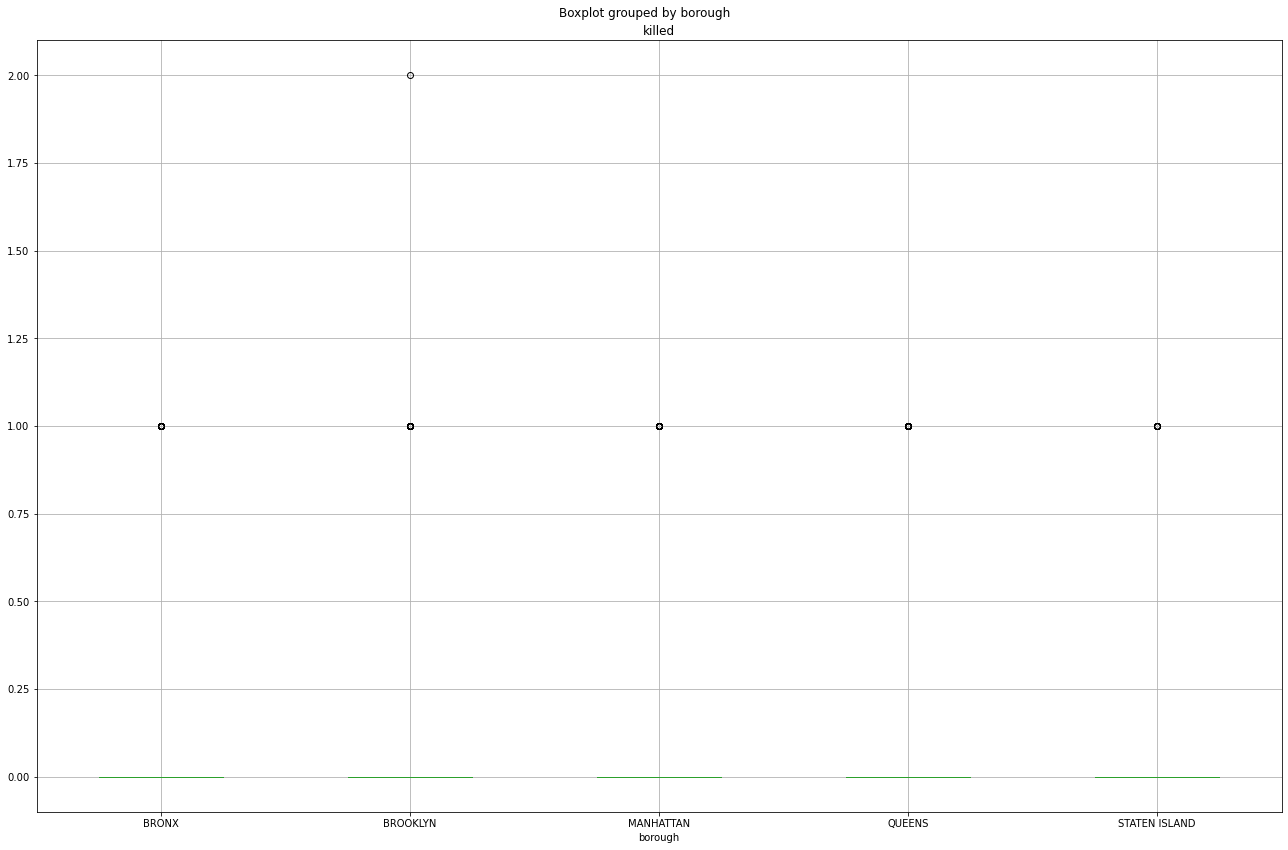

In [13]:
accidents.boxplot('killed', by='borough', figsize=(18,12))
plt.tight_layout()
plt.show()

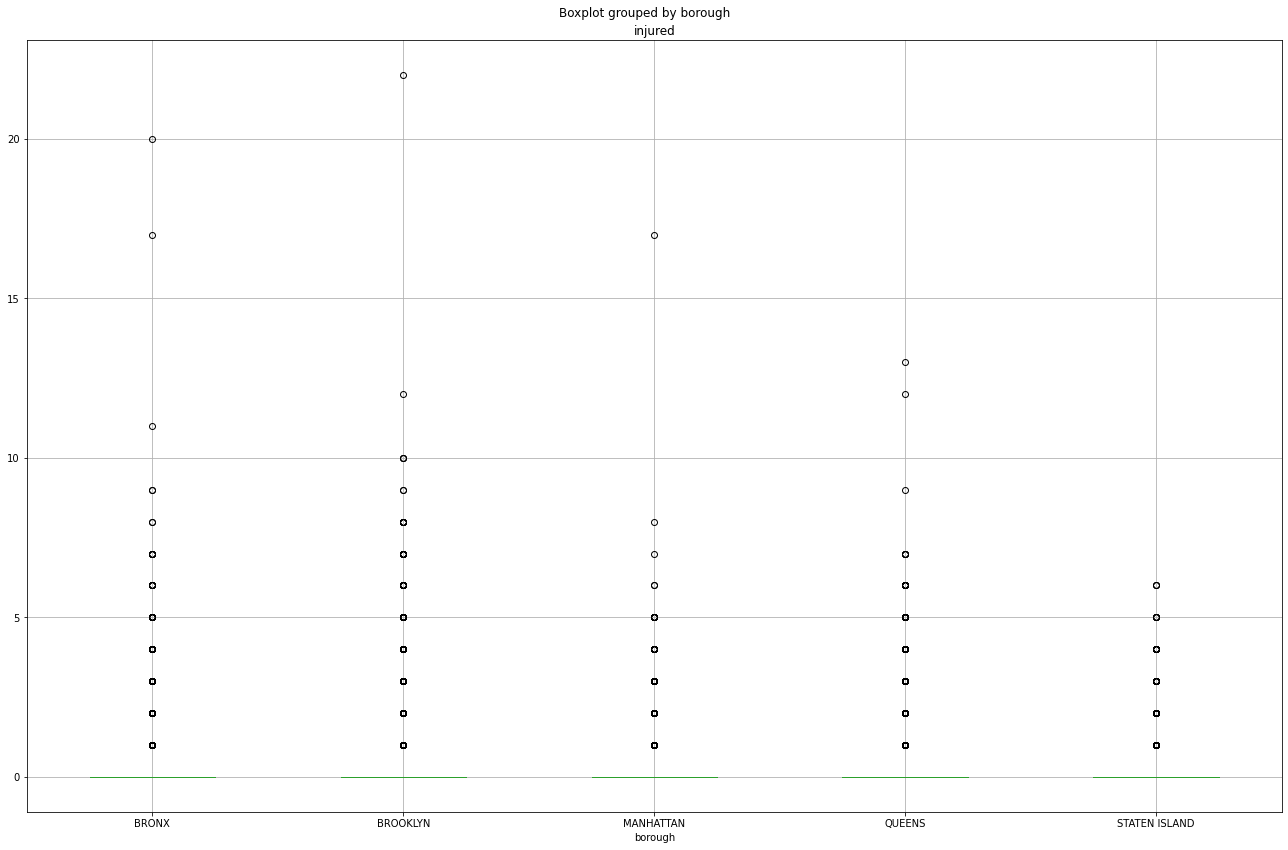

In [14]:
accidents.boxplot('injured', by='borough', figsize=(18,12))
plt.tight_layout()
plt.show()

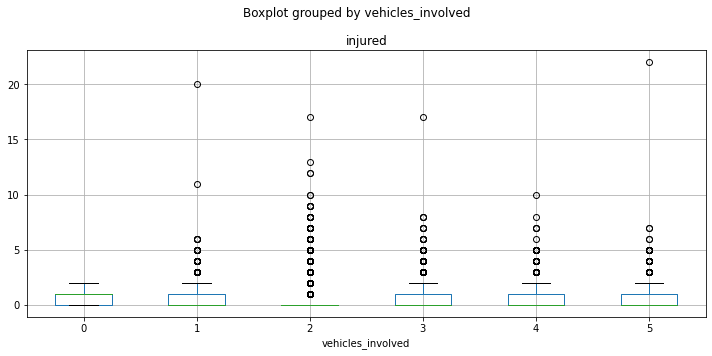

In [15]:
accidents.boxplot('injured', by='vehicles_involved', figsize=(10,5))
plt.tight_layout()
plt.show()

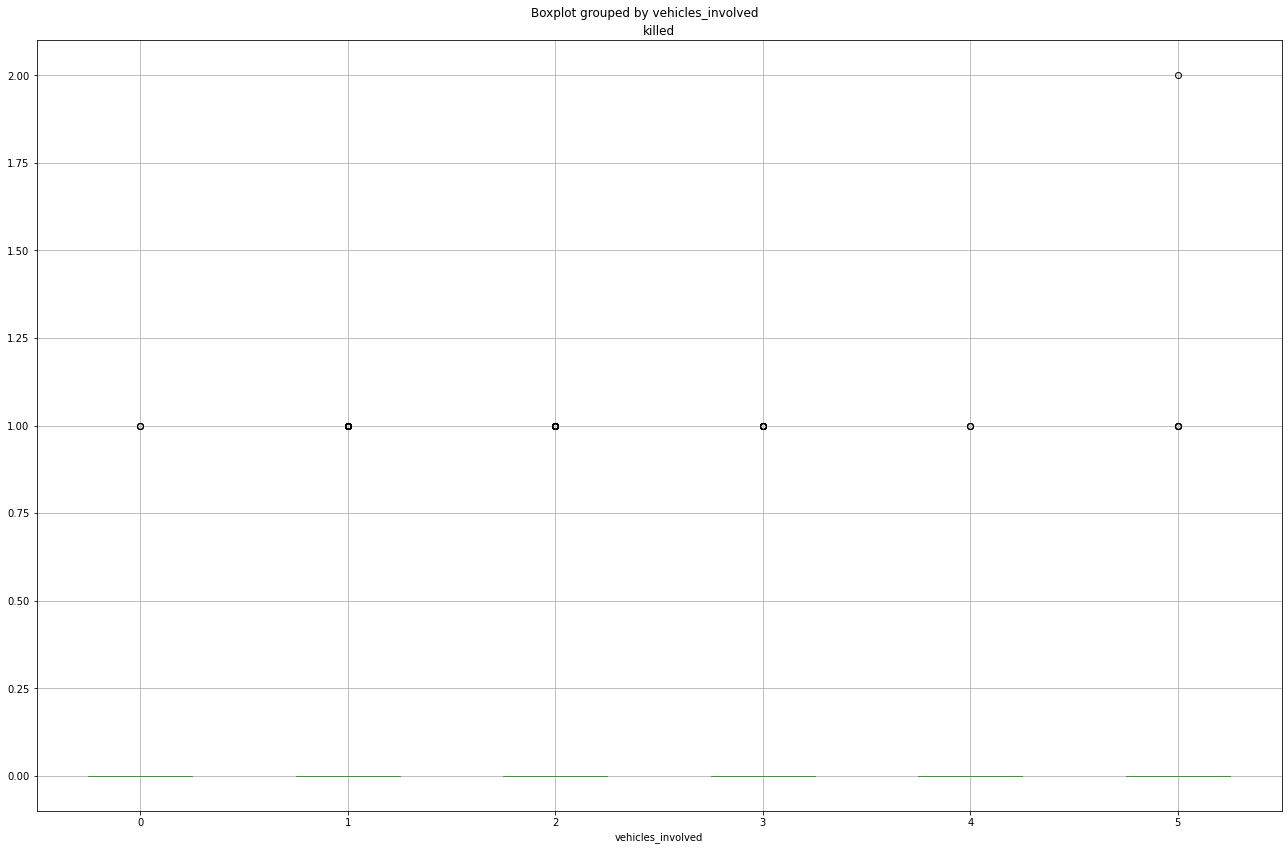

In [16]:
accidents.boxplot('killed', by='vehicles_involved', figsize=(18,12))
plt.tight_layout()
plt.show()

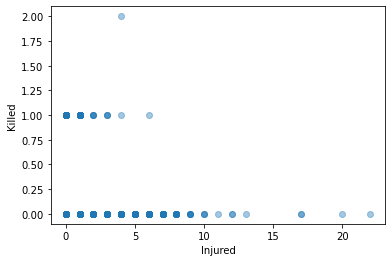

In [17]:
plt.scatter(accidents['injured'], accidents['killed'], alpha=0.4)
plt.xlabel('Injured')
plt.ylabel('Killed')
plt.show()

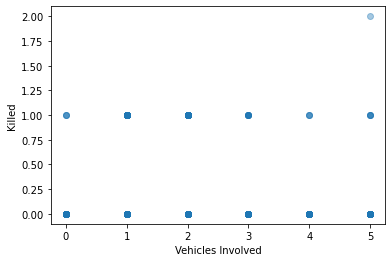

In [18]:
plt.scatter(accidents['vehicles_involved'], accidents['killed'], alpha=0.4)
plt.xlabel('Vehicles Involved')
plt.ylabel('Killed')
plt.show()

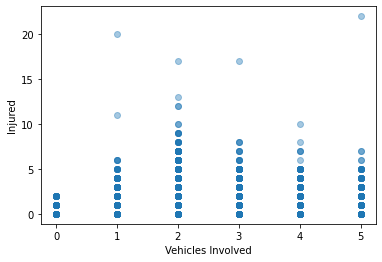

In [19]:
plt.scatter(accidents['vehicles_involved'], accidents['injured'], alpha=0.4)
plt.xlabel('Vehicles Involved')
plt.ylabel('Injured')
plt.show()

Analysis:

One surprising find in the first and second boxplot is that the median number of people killed and injured are 0. This is a surprising find because one might expect that there would be a higher median number of people killed/injured in accidents. This fact is also true regardless of the borough that the accidnet occurred in, which is even more surprising – we expected the data to vary more by borough.  

In our entire data set, the mean number of vehicles in a given accident is around 1.9 and the standard deviation of the number of vehicles involved is around 0.5. 

In our entire data set, the mean number of people injured in a given accident is around .3 and the standard deviation for the number of people injured is around .6. 

In our entire data set, the mean number of people killed in a given accident is around 0.001 and the standard deviation for the number of people killed is around 0.04. 

The mean number of vehicles involved in a car accident tells us that in a given accident, there is on average 2 cars involved. In a sense this is somewhat logical, because when you normally see accidents occur, it involves the collision of 2 vehicles.

The mean number of people injured in a given accident is bigger than the mean number people killed in a given accident also makes sense intuitively because one of the biggest selling points of car today is in the safety aspect of the car. 

Another surprising find in our data set is that in the scatterplot, as the mean number of vehicles involved in a given accident increased, the number of accidents does not also increase. This means that there is no positive correlation between the amount of vehicles in a accident and the amount of people hurt. You would normally expect that as more vehicles are involved in accidents, more people would be injured, but that is not the case here. When looking at the scatterplot that shows the relationship between the mean number of vehicles involved in a given accident and the mean number of people killed, we observed that there is also no positive correlation. The mean number of people killed is somewhat expected because it is normally the serverity of the accident that affect the number of people killed, and more vehicles involved in a accident does not necessarily imply that the accident was more severe. 

---

## Accident Severity vs Time (Linear Regression)

In this section we will be analyzing the accidents as a function of time of day on a scatterplot. We begin with the entire cleaned set and and sum the total minutes of the day, which we graph against the accident injuries. We then perform linear regression.

Before we do this, we notice that there are some NaN entries of 'injured'. Examining these gives us the following. These are all single vehicle accidents. While it is difficult to determine the injured/killed based on this data alone, the parsed_time object of the entries are spread out accross the day (hours+minutes) so it doesn't significantly impact our analysis in regards to time vs accident severity.

In [20]:
na_injured = accidents['injured'].isna()
print(accidents[na_injured].to_string())

accidents = accidents[~na_injured]

       Unnamed: 0        date   time   borough  killed  injured  vehicles_involved   latitude  longitude         parsed_time
36067      375459  09/30/2018   6:30    QUEENS     NaN      NaN                  1  40.749767  -73.86381 2018-09-30 06:30:00
56060      406506  07/23/2018  12:50  BROOKLYN     0.0      NaN                  1  40.686030  -73.93268 2018-07-23 12:50:00
78804      492952  02/01/2018  16:08    QUEENS     0.0      NaN                  1  40.759315  -73.86220 2018-02-01 16:08:00
82772      501685  01/05/2018  15:00     BRONX     NaN      NaN                  1  40.822437  -73.83704 2018-01-05 15:00:00


Slope: 0.0000
Intercept: 0.2104


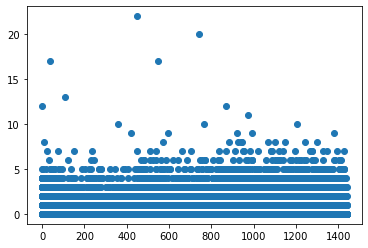

In [21]:
time_of_day = np.array([])
for time in accidents['parsed_time']:
    time_of_day = np.append(time_of_day, time.hour*60 + time.minute)
plt.scatter(time_of_day, accidents['injured'])

reg = LinearRegression()
reg.fit(time_of_day.reshape(-1,1), accidents['injured'])
print('Slope: {:.4f}\nIntercept: {:.4f}'.format(reg.coef_[0], reg.intercept_))
plt.show()

Then we graph the five separate boroughs and perform multivariable regression. To avoid repeat work, we can define a function to find the time of day in minutes and call this function mutliple times to get the time of day of each accident.

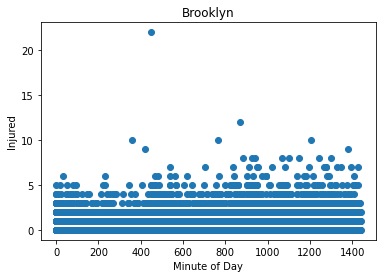

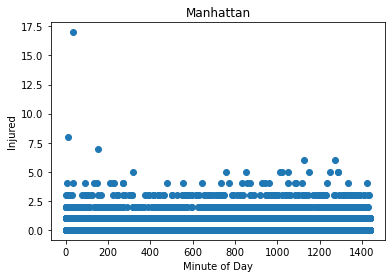

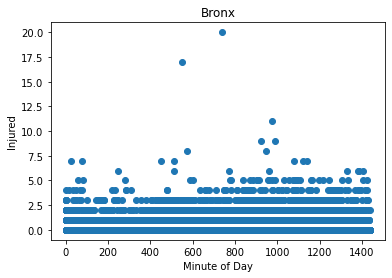

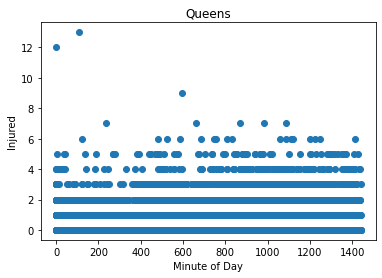

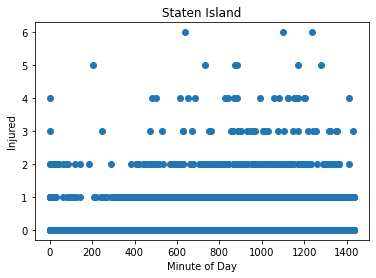


Brooklyn
Slope: 0.0001
Intercept: 0.2319

Manhattan
Slope: 0.0000
Intercept: 0.1688

Bronx
Slope: 0.0001
Intercept: 0.2149

Queens
Slope: 0.0001
Intercept: 0.2193

Staten Island
Slope: 0.0000
Intercept: 0.1827


In [22]:
def date_to_minutes(arr):
    tod = np.array([])
    for time in arr['parsed_time']:
        tod = np.append(tod, time.hour*60 + time.minute)
    return tod

# Separate by borough
brooklyn = accidents[accidents['borough'] == 'BROOKLYN']
brooklyn_time = date_to_minutes(brooklyn)
plt.scatter(brooklyn_time, brooklyn['injured'])
plt.title('Brooklyn')
plt.xlabel('Minute of Day')
plt.ylabel('Injured')
plt.show()

manhattan = accidents[accidents['borough'] == 'MANHATTAN']
manhattan_time = date_to_minutes(manhattan)
plt.scatter(manhattan_time, manhattan['injured'])
plt.title('Manhattan')
plt.xlabel('Minute of Day')
plt.ylabel('Injured')
plt.show()

bronx = accidents[accidents['borough'] == 'BRONX']
bronx_time = date_to_minutes(bronx)
plt.scatter(bronx_time, bronx['injured'])
plt.title('Bronx')
plt.xlabel('Minute of Day')
plt.ylabel('Injured')
plt.show()

queens = accidents[accidents['borough'] == 'QUEENS']
queens_time = date_to_minutes(queens)
plt.scatter(queens_time, queens['injured'])
plt.title('Queens')
plt.xlabel('Minute of Day')
plt.ylabel('Injured')
plt.show()

staten_island = accidents[accidents['borough'] == 'STATEN ISLAND']
staten_island_time = date_to_minutes(staten_island)
plt.scatter(staten_island_time, staten_island['injured'])
plt.title('Staten Island')
plt.xlabel('Minute of Day')
plt.ylabel('Injured')
plt.show()

brooklyn_reg = LinearRegression()
brooklyn_reg.fit(brooklyn_time.reshape(-1,1), brooklyn['injured'])
print('\nBrooklyn\nSlope: {:.4f}\nIntercept: {:.4f}'.format(brooklyn_reg.coef_[0], brooklyn_reg.intercept_))

manhattan_reg = LinearRegression()
manhattan_reg.fit(manhattan_time.reshape(-1,1), manhattan['injured'])
print('\nManhattan\nSlope: {:.4f}\nIntercept: {:.4f}'.format(manhattan_reg.coef_[0], manhattan_reg.intercept_))

bronx_reg = LinearRegression()
bronx_reg.fit(bronx_time.reshape(-1,1), bronx['injured'])
print('\nBronx\nSlope: {:.4f}\nIntercept: {:.4f}'.format(bronx_reg.coef_[0], bronx_reg.intercept_))

queens_reg = LinearRegression()
queens_reg.fit(queens_time.reshape(-1,1), queens['injured'])
print('\nQueens\nSlope: {:.4f}\nIntercept: {:.4f}'.format(queens_reg.coef_[0], queens_reg.intercept_))

staten_island_reg = LinearRegression()
staten_island_reg.fit(staten_island_time.reshape(-1,1), staten_island['injured'])
print('\nStaten Island\nSlope: {:.4f}\nIntercept: {:.4f}'.format(staten_island_reg.coef_[0], staten_island_reg.intercept_))

plt.show()

Apart from a slight upward trend in time vs accident severity in Bronx and Queens, the linear regression of time vs accidents in Brooklyn, Manhattan, and Staten Island has a coefficient of 0, meaning for each increase in unit time (minutes) there is an expected increase in the accident severity of 0 casualties.

---

## Accident Severity vs Time (Multivariable Regression)

Now we can use sklearn's linear regression to fit a multivariable linear regression with the accident severity of all areas vs time. Using Seaborn we can also graph all the boroughs with their linear regressions overlaid to see their differences.


Multivariable Regression
Slope: 0.0000
Intercept: 0.2035
Brooklyn y-intercept: 0.03
Bronx y-intercept: 0.04
Manhattan y-intercept: -0.07
Queens y-intercept: 0.02
Staten Island y-intercept: -0.02


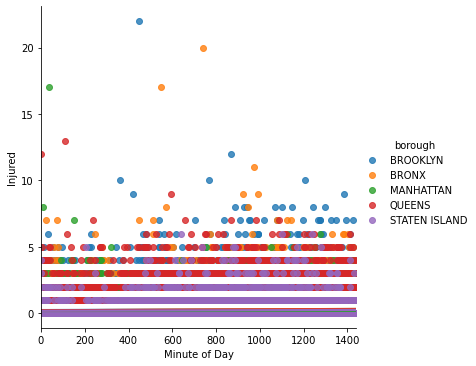

In [23]:
multi_reg = LinearRegression()
minute_time = date_to_minutes(accidents)
accidents['minute_time'] = minute_time
borough_indicators = pd.get_dummies(accidents, columns = ['borough'])

multi_reg.fit(borough_indicators[['minute_time', 'borough_BRONX', 'borough_BROOKLYN', 'borough_MANHATTAN', 'borough_QUEENS', 'borough_STATEN ISLAND']], borough_indicators['injured'])
print('\nMultivariable Regression\nSlope: {:.4f}\nIntercept: {:.4f}'.format(multi_reg.coef_[0], multi_reg.intercept_))

print('Brooklyn y-intercept: {:.2f}\nBronx y-intercept: {:.2f}\nManhattan y-intercept: {:.2f}\nQueens y-intercept: {:.2f}\nStaten Island y-intercept: {:.2f}'.format(multi_reg.coef_[1], multi_reg.coef_[2], multi_reg.coef_[3], multi_reg.coef_[4], multi_reg.coef_[5]))

sns.lmplot(x = 'minute_time', y = 'injured', hue = 'borough', data = accidents)
plt.xlabel('Minute of Day')
plt.ylabel('Injured')
plt.show()

There is a multivariable correlation slope of 0, showing that for each increase in unit time there is an expected increase in 0 expected injured. Additionally, the y-intercept coefficient varies by the boroughs but is mostly near 0 at midnight. It is important to note that the regression of the whole set also does not display Simpson's paradox, where the trend of the combined groups is different than for individual ones.

---

## OLS Linear Regression

We will measure the effect of the time of day on the number of injuries with an ordinary least squares linear regression model. This will give us the two classical statistical measures: a p-value and a confidence interval. To do this we will be using the statsmodels package.

In [24]:
import statsmodels.formula.api as smf

sm_model = smf.ols("injured ~ time_of_day", data=accidents)
result = sm_model.fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                injured   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     94.73
Date:                Mon, 10 May 2021   Prob (F-statistic):           2.22e-22
Time:                        00:42:12   Log-Likelihood:            -1.4081e+05
No. Observations:              149227   AIC:                         2.816e+05
Df Residuals:                  149225   BIC:                         2.816e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.2104      0.004     49.700      0.000       0.202       0.219
time_of_day   4.65e-05   4.78e-06      9.733      0.000    3.71e-05    5.59e-05
==============================================================================
Omnibus:                   144278.094   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         14407841.714
Skew:                           4.474   Prob(JB):                         0.00
Kurtosis:                      50.298   Cond. No.                     2.33e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.33e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Analysis of Significance

The p-value generated by the OLS regression is 0.000, suggesting that we reject the null hypothesis (no correlation) as the result we got was statistically significant as it is under the threshold of 0.05. This means that although the slope is a very small positive value (4.65e-05), there is a very strong linear correlation between the time of day (in minutes) and the number injured. This suggests that the data suggests that there is a strong, slightly positive correlation between the time of day and severity of accidents.

Additionally, the confidence interval of the interept is (0.202	0.219) and the slope is (3.71e-05	5.59e-05), suggesting that at time 0 we are 95% confident that the number injured and increase in injured with respect to time (in minutes) will fall within these ranges

## Limitations of Significance Metrics

Although our p-value was very low, suggesting a strong statistical significance, our OLS regression could have been limited by the fact that time of day is discontinuous at 0. Despite this, our histogram analysis (performed later) shows us no clear trends among accident severity and binned time, particularly near time 0, so this should not bring enough weight to skew the regression and increase the residuals.

The confidence intervals and p-value could also be imapcted by the prevalence of unreported accidents. For instance, in a smaller fender benders without accidents, the parties might not report the accident to the police or insurance. This would likely happen during rush hour or times of day where traffic volume is higher and thus accident severity might experience a dip during such times, resulting in a higher amount of residuals and reduced accuracy of a linear regression.

---

## Train Split Test on Linear Regression (Number of Vehicles vs People Killed/People Injured)

Here we want to see if there is any relationship between number of vehicles in a crash and the number of people killed and number of people injured. First we set up a train split test to split our data in 80 percent training data and 20 percent testing data. In each case we used the variable "X" and "Y" to represent the predictor variable and response variable (respectively). One obstacle we found was that some of the columns in injured, killed, and vehicles involved had NaN value. Since there were only a few entries we thought that removing them entirely would provide the best results as there are hundreds of thousands of entries inside of the dataset.

In [25]:
#dropping NaN values for killed and vehicles involved

accidents = accidents[accidents['killed'].notna()]
accidents = accidents[accidents['vehicles_involved'].notna()]

In [26]:
# train-test split between vehicles involved and killed (80%/20%)
X = accidents[['vehicles_involved']]
Y = accidents[['killed']]
Z = accidents[['injured']]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size= 0.2)
x_train, x_test, z_train, z_test = train_test_split(X, Z, test_size= 0.2)

In [27]:
lm1 = LinearRegression()
model = lm1.fit(x_train,y_train)
print('prediction accuracy test set (number of vehicles and killed): {:.6f}%'.format(model.score(x_test,y_test)*100))

prediction accuracy test set (number of vehicles and killed): -0.005067%


In [28]:
lm2 = LinearRegression()
model = lm2.fit(z_train,y_train)
print('prediction accuracy test set (number of vehicles and injured): {:.6f}%'.format(model.score(x_test,y_test)*100))

prediction accuracy test set (number of vehicles and injured): -0.016640%


After fitting a linear regression model onto the split train test, we compared the results of our testing data and training data. The overall prediction accuracy was very close to 0 percent for both relationshop between vehicles involved and killed/injured. This is to be expected since increasing the number of vehicles does not necesarily result in more deaths or injuries as data shown in sections above found similar deaths and injuries with varying number of vehicles in the crash. This can be attributed to better safety technology in cars or.... (maybe add more)

---

## Histogram Analysis of Time of Day versus Number of Accidents

In [29]:
# create a new "hour_range" column so that each accident is grouped into the hour

# removing N/A data because it the data messes up our numerical computation
accidents = accidents[accidents['longitude'] != 0]

accidents = accidents.dropna(subset = ["borough"])
accidents.reset_index(drop=True, inplace=True)

# making the time column into data time objects
accidents['time'] = pd.to_datetime(accidents['time'], format="%H:%M" )

each_hour = []
for i in range(len(accidents['time'])):
    each_hour.append(accidents['time'][i].hour)
    
accidents['hour_range'] = each_hour

# getting all of the unique boroughs
individual_boroughs = accidents['borough'].unique()

In [30]:
# The number of accidents from 12 am to 6 am in each of the borough
borough_12am_6am = []
for i in individual_boroughs:
    borough_am_twelveTOsix = accidents.loc[accidents['borough'] == i]
    borough_am_twelveTOsix = borough_am_twelveTOsix.loc[borough_am_twelveTOsix['hour_range'].isin([0,1,2,3,4,5])]
    borough_12am_6am.append(borough_am_twelveTOsix.shape[0])
    print("Borough: {} ".format(i))
    print("The number of accidents from 12 am to 6 am: {}".format(borough_am_twelveTOsix.shape[0]))
    print("\n")

# The number of accidents from 6 am to 12 pm in each of the borough
borough_6am_12pm = []
for i in individual_boroughs:
    borough_am_sixTOtwelve = accidents.loc[accidents['borough'] == i]
    borough_am_sixTOtwelve = borough_am_sixTOtwelve.loc[borough_am_sixTOtwelve['hour_range'].isin([6,7,8,9,10,11])]
    borough_6am_12pm.append(borough_am_sixTOtwelve.shape[0])
    print("Borough: {} ".format(i))
    print("The number of accidents from 6 am to 12 pm: {}".format(borough_am_sixTOtwelve.shape[0]))
    print("\n")
    
# The number of accidents from 12 pm to 6 pm in each of the borough
borough_12pm_6pm = []
for i in individual_boroughs:
    borough_pm_twelveTOsix = accidents.loc[accidents['borough'] == i]
    borough_pm_twelveTOsix = borough_pm_twelveTOsix.loc[borough_pm_twelveTOsix['hour_range'].isin([12,13,14,15,16,17])]
    borough_12pm_6pm.append(borough_pm_twelveTOsix.shape[0])
    print("Borough: {} ".format(i))
    print("The number of accidents from 12 pm to 6 pm: {}".format(borough_pm_twelveTOsix.shape[0]))
    print("\n")
    
# The number of accidents from 6 pm to 12 am in each of the borough
borough_6pm_12am = []
for i in individual_boroughs:
    borough_pm_sixTOtwelve = accidents.loc[accidents['borough'] == i]
    borough_pm_sixTOtwelve = borough_pm_sixTOtwelve.loc[borough_pm_sixTOtwelve['hour_range'].isin([18,19,20,21,22,23])]
    borough_6pm_12am.append(borough_pm_sixTOtwelve.shape[0])
    print("Borough: {} ".format(i))
    print("The number of accidents from 6 pm to 12 am: {}".format(borough_pm_sixTOtwelve.shape[0]))
    print("\n")
  
# The number of accidents for a 24 hour period in each of the borough
borough_whole_24 = []
for i in individual_boroughs:
    borough_whole24 = accidents.loc[accidents['borough'] == i]
    borough_whole_24.append(borough_whole24.shape[0])
    print("Borough: {} ".format(i))
    print("The number of accidents for a 24 hour period: {}".format(borough_whole24.shape[0]))
    print("\n")

Borough: BROOKLYN 
The number of accidents from 12 am to 6 am: 3955


Borough: BRONX 
The number of accidents from 12 am to 6 am: 2157


Borough: MANHATTAN 
The number of accidents from 12 am to 6 am: 3450


Borough: QUEENS 
The number of accidents from 12 am to 6 am: 3588


Borough: STATEN ISLAND 
The number of accidents from 12 am to 6 am: 373


Borough: BROOKLYN 
The number of accidents from 6 am to 12 pm: 12403


Borough: BRONX 
The number of accidents from 6 am to 12 pm: 6374


Borough: MANHATTAN 
The number of accidents from 6 am to 12 pm: 8100


Borough: QUEENS 
The number of accidents from 6 am to 12 pm: 11054


Borough: STATEN ISLAND 
The number of accidents from 6 am to 12 pm: 1545


Borough: BROOKLYN 
The number of accidents from 12 pm to 6 pm: 19317


Borough: BRONX 
The number of accidents from 12 pm to 6 pm: 9178


Borough: MANHATTAN 
The number of accidents from 12 pm to 6 pm: 11976


Borough: QUEENS 
The number of accidents from 12 pm to 6 pm: 16393


Borough: STATEN IS

In [31]:
#breaking up the accidents based on every 6 hours for all of the boroughs

# This is from 12 am to 6 am
am_twelveTOsix = accidents[accidents['hour_range'].isin([0,1,2,3,4,5])]

# This is from 6 am to 12 pm
am_sixTOtwelve = accidents[accidents['hour_range'].isin([6,7,8,9,10,11])]

# This is from 12 pm to 6 pm
pm_twelveTOsix = accidents[accidents['hour_range'].isin([12,13,14,15,16,17])]

# This is from 6 pm to 12 am
pm_sixTOtwelve = accidents[accidents['hour_range'].isin([18,19,20,21,22,23])]

# The number of poeple killed/injured based on every 6 hours for all of the boroughs
killed_12am_6am = am_twelveTOsix['killed'].sum()
print("The number of people that were killed in accidents between 12am and 6am are: {}".format(killed_12am_6am))
print("\n")

injured_12am_6am = am_twelveTOsix['injured'].sum()
print("The number of people that were injured in accidents between 12am and 6am are: {}".format(injured_12am_6am))
print("\n")

killed_6am_12pm = am_sixTOtwelve['killed'].sum()
print("The number of people that were killed in accidents between 6am and 12pm are: {}".format(killed_6am_12pm))
print("\n")

injured_6am_12pm = am_sixTOtwelve['injured'].sum()
print("The number of people that were injured in accidents between 6am and 12pm are: {}".format(injured_6am_12pm))
print("\n")

killed_12pm_6pm = pm_twelveTOsix['killed'].sum()
print("The number of people that were killed in accidents between 12pm and 6pm are: {}".format(killed_12pm_6pm))
print("\n")

injured_12pm_6pm = pm_twelveTOsix['injured'].sum()
print("The number of people that were injured in accidents between 12pm and 6pm are: {}".format(injured_12pm_6pm))
print("\n")

killed_6pm_12am = pm_sixTOtwelve['killed'].sum()
print("The number of people that were killed in accidents between 6pm and 12am are: {}".format(killed_6pm_12am))
print("\n")

injured_6pm_12am = pm_sixTOtwelve['injured'].sum()
print("The number of people that were injured in accidents between 6pm and 12am are: {}".format(injured_6pm_12am))
print("\n")

The number of people that were killed in accidents between 12am and 6am are: 20.0


The number of people that were injured in accidents between 12am and 6am are: 3901.0


The number of people that were killed in accidents between 6am and 12pm are: 32.0


The number of people that were injured in accidents between 6am and 12pm are: 8370.0


The number of people that were killed in accidents between 12pm and 6pm are: 39.0


The number of people that were injured in accidents between 12pm and 6pm are: 13850.0


The number of people that were killed in accidents between 6pm and 12am are: 48.0


The number of people that were injured in accidents between 6pm and 12am are: 10902.0




C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


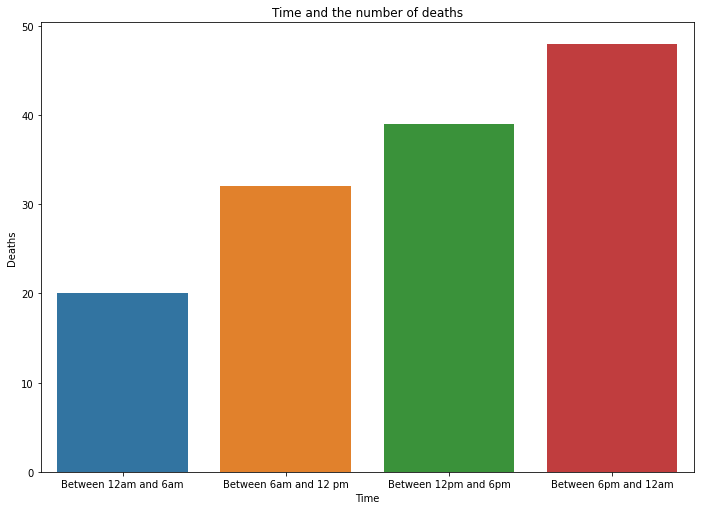

<Figure size 7200x1080 with 0 Axes>

In [32]:
# Plotting how time impacts the number of deaths that results in accidents
y_killed = [killed_12am_6am, killed_6am_12pm, killed_12pm_6pm, killed_6pm_12am]
x_killed = ["Between 12am and 6am", "Between 6am and 12 pm", "Between 12pm and 6pm", "Between 6pm and 12am"]

#setting dimensions of the plot
AXdims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=AXdims)

sns.barplot(x_killed, y_killed, ax=ax)
plt.xlabel("Time")
plt.ylabel("Deaths")
plt.title("Time and the number of deaths")
plt.figure(figsize=(100, 15))
plt.show()

## **Analysis of Time of day and the number of deaths that result from accidents binned by 6 hour periods:**
>This graph shows how the change in time (every 6 hours) affects the number of deaths that results from traffic accidents. This graph is showing that as time moves forward (12 midnight back to 12 midnight) the number of deaths that results from traffic accidents increase. More specifically, during 12am to 6am when it is midnight (most of the people are sleeping) the number of traffic accidents deaths are the lowest - 20 deaths. During 6am to 12pm, when people are waking up and getting to work, the death counts that results from traffic accidents increase to about 32. As the day progresses, at 12pm to 6pm, the death count increase to 39. Lastly, from 6pm to 12am the death counts are the highest at 48.

>This bar graph is telling us that more deaths result from car accidents when the day gets darker. Though there are many factors that might come to play, our findings here is tells us that there is a relationship between time of day and the number of people killed in accidents. 

>Another thing to point out here is that we are not concluding that time of day is correlated with the severity of accidents that occur, because that is not something that our graph is telling us. From this graph, we are only arriving at the conclusion that there simply exists a relationship between time of day and the number of people killed in car accidents.


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


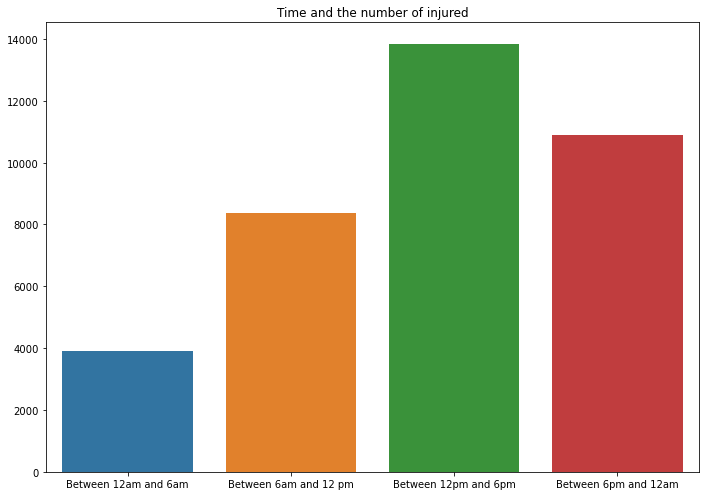

<Figure size 7200x1080 with 0 Axes>

In [33]:
# Plotting how time impacts the number of the injured people that results in accidents
y_injured = [injured_12am_6am, injured_6am_12pm, injured_12pm_6pm, injured_6pm_12am]
x_injured = ["Between 12am and 6am", "Between 6am and 12 pm", "Between 12pm and 6pm", "Between 6pm and 12am"]

#setting dimensions of the plot
AXdims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=AXdims)

sns.barplot(x_injured, y_injured, ax=ax)
plt.title("Time and the number of injured")
plt.figure(figsize=(100, 15))
plt.show()

## **Analysis of Time of day and the number of people injured that result from accidents binned by 6 hour periods:**
>This graph shows how the change in time (every 6 hours) affects the number of injured that results from traffic accidents. The patterns of this graph shows that between 12am and 6am the number of people injured as a result of traffic accidents are at a minimum of 3903 people. The graph also shows that between 12pm and 6pm, the number of people injured as a result of traffic accidents are at a maximum of 13854 people.

>This graph does not reflect the trend that we saw in our graph that inspected the relationship between the time of day and the number of deaths that result from car accidents. 

>In this graph, it is observable that most of the injured that results from car accidents peak during the day time instead of the night time(from our time of day and the number of deaths graph we saw that most deaths that occur in accidents happen during the "night time"). 

>Another observable trend between this graph and the time of day vs the number of deaths graph is that the least number of death/injured that results from car accidents occur between 12am and 6am. In New York City, this is the time that most people are asleep, so to some extent this actually makes sense. Less people on the road results in less injured/killed in accidents.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


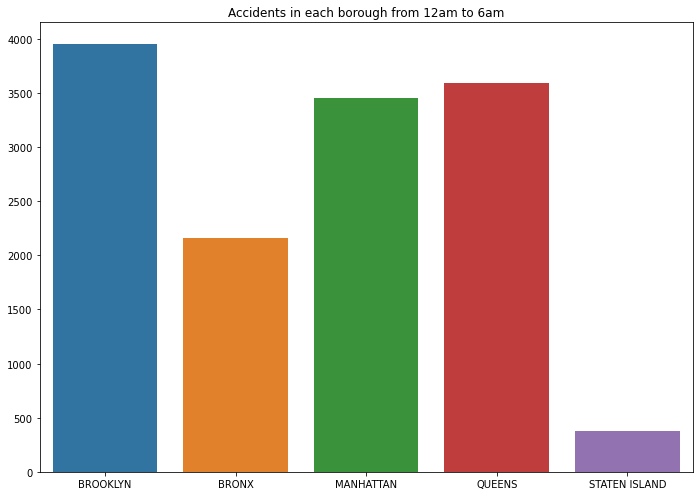

<Figure size 7200x1080 with 0 Axes>

In [34]:
# Plotting the number of accidents in each borough from 12am to 6am
y_num_accidents = borough_12am_6am
x_borough_names = individual_boroughs

#setting dimensions of the plot
AXdims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=AXdims)

sns.barplot(x_borough_names, y_num_accidents, ax=ax)
plt.title("Accidents in each borough from 12am to 6am")
plt.figure(figsize=(100, 15))
plt.show()

## **Analysis of Accidents in each borough from 12am to 6am:**
>This graphs shows the number of accidents in each borough from 12am to 6am. From the graph, we observed that Brooklyn has the highest number of accidents and Staten Island has the lowest number of accidents. We can also observe that Queens has the second most number of accidents, followed by Manhattan and then the Bronx.

>One thing to note for this graph is that between 12am and 6am is the time when most of the people are asleep in New York City. Another thing to note is that the number of accidents that are shown in this graph shows all of the accidents between this time interval for the year of 2018. 

>Queens is the biggest borough of the 5 boroughs, but it has the second most number of accidents.

>Brooklyn has the most number of accdients even though it is the second largest borough of the 5 boroughs.

>Manhattan has the third most number of accidents even though it is the smallest of the 5 boroughs.

>Bronx has the four most number of accidents, and it is the fourth largest borough.

>Staten Island has the least amount of accidents even though it is the third largest borough.

>From the graph we can see that Staten Island has significantly less accidents during this time interval compared to all of the other boroughs and this was really interesting.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


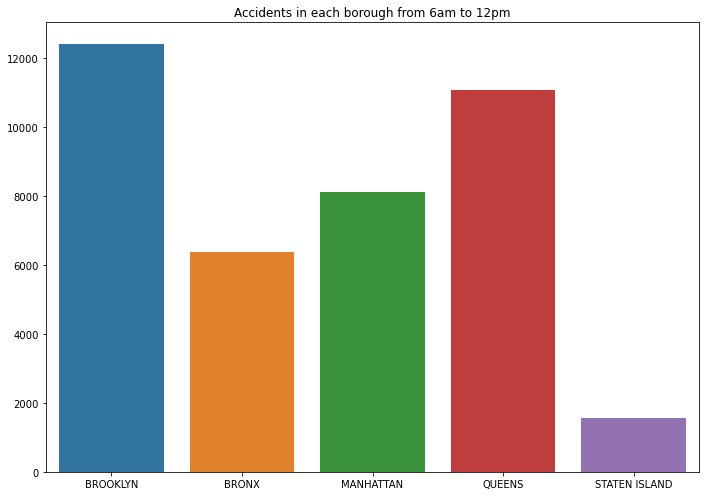

<Figure size 7200x1080 with 0 Axes>

In [35]:
# Plotting the number of accidents in each borough from 6am to 12pm
y_num_accidents = borough_6am_12pm
x_borough_names = individual_boroughs

#setting dimensions of the plot
AXdims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=AXdims)

sns.barplot(x_borough_names, y_num_accidents, ax=ax)
plt.title("Accidents in each borough from 6am to 12pm")
plt.figure(figsize=(100, 15))
plt.show()

## **Analysis of Accidents in each borough from 6am to 12pm for all of the boroughs:**
>This graphs shows the number of accidents in each borough from 6am to 12pm. From the graph, we observed that Brooklyn has the highest number of accidents and Staten Island has the lowest number of accidents. We can also observe that Queens has the second most number of accidents, followed by Manhattan and then the Bronx.

>Queens is the biggest borough of the 5 boroughs, but it has the second most number of accidents.

>Brooklyn has the most number of accdients even though it is the second largest borough of the 5 boroughs.

>Manhattan has the third most number of accidents even though it is the smallest of the 5 boroughs.

>Bronx has the four most number of accidents, and it is the fourth largest borough.

>Staten Island has the least amount of accidents even though it is the third largest borough.

>Again we see this pattern that Staten Island has significantly less accidents compared to the other borough and this is really intriguing, especially with the fact that Staten Island is the third largest borough. 

>Another thing to note is that from 6am to 12pm compared to the previous graph of from 12am to 6am, we see that the number of accidents actually increases for all of the boroughs. If we look at the Y-axis we can see that the intervals have changed. The maximum Y-axis value from the 12am to 6am graph was around 4000, but in this graph we can see that the maximum Y-axis value is actually greater than 12,000. If we take a closer look at the graph, we can see that the number of accidents increased by around 3 times for Brooklyn, 3 times for Queens, 2 times for Manhattan, 3 times for Bronx, and around 4 times for Staten Island. Although the amount of accidents in Staten Island increased by a factor of 4 in the span of 6 hours, it is still has significantly less amount of accidents compared to the other boroughs.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


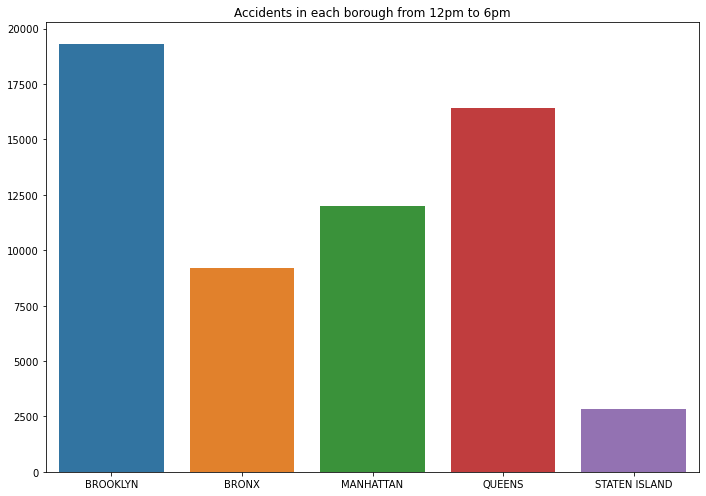

<Figure size 7200x1080 with 0 Axes>

In [36]:
# Plotting the number of accidents in each borough from 12pm to 6pm
y_num_accidents = borough_12pm_6pm
x_borough_names = individual_boroughs

#setting dimensions of the plot
AXdims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=AXdims)

sns.barplot(x_borough_names, y_num_accidents, ax=ax)
plt.title("Accidents in each borough from 12pm to 6pm")
plt.figure(figsize=(100, 15))
plt.show()

## **Analysis of Accidents in each borough from 12pm to 6pm for all of the boroughs:**
>This graphs shows the number of accidents in each borough from 12pm to 6pm. From the graph, we observed that Brooklyn has the highest number of accidents and Staten Island has the lowest number of accidents. We can also observe that Queens has the second most number of accidents, followed by Manhattan and then the Bronx.

>Queens is the biggest borough of the 5 boroughs, but it has the second most number of accidents.

>Brooklyn has the most number of accdients even though it is the second largest borough of the 5 boroughs.

>Manhattan has the third most number of accidents even though it is the smallest of the 5 boroughs.

>Bronx has the four most number of accidents, and it is the fourth largest borough.

>Staten Island has the least amount of accidents even though it is the third largest borough.

>Again we see this pattern that Staten Island has significantly less accidents compared to the other borough and this is really intriguing, especially with the fact that Staten Island is the third largest borough. 

>Compared to the previous graph, we can again see that the number of accidents in each of the 5 boroughs have again increased.

### *Insights from the graph:*
This graphs shows the number of accidents in each borough from 12pm to 6pm. From the graph, we observed that Brooklyn has the highest number of accidents and Staten Island has the lowest number of accidents. We can also observe that Queens has the second most number of accidents, followed by Manhattan and then the Bronx.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


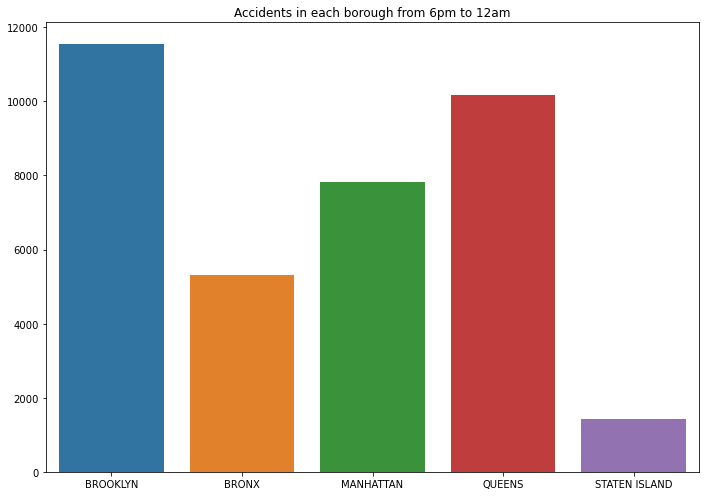

<Figure size 7200x1080 with 0 Axes>

In [37]:
# Plotting the number of accidents in each borough from 6pm to 12am
y_num_accidents = borough_6pm_12am
x_borough_names = individual_boroughs

#setting dimensions of the plot
AXdims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=AXdims)

sns.barplot(x_borough_names, y_num_accidents, ax=ax)
plt.title("Accidents in each borough from 6pm to 12am")
plt.figure(figsize=(100, 15))
plt.show()

## **Analysis of Accidents in each borough from 6pm to 12am for all of the boroughs:**
>This graphs shows the number of accidents in each borough from 6pm to 12am. From the graph, we observed that Brooklyn has the highest number of accidents and Staten Island has the lowest number of accidents. We can also observe that Queens has the second most number of accidents, followed by Manhattan and then the Bronx.

>Queens is the biggest borough of the 5 boroughs, but it has the second most number of accidents.

>Brooklyn has the most number of accdients even though it is the second largest borough of the 5 boroughs.

>Manhattan has the third most number of accidents even though it is the smallest of the 5 boroughs.

>Bronx has the four most number of accidents, and it is the fourth largest borough.

>Staten Island has the least amount of accidents even though it is the third largest borough.

>Again we see this pattern that Staten Island has significantly less accidents compared to the other borough and this is really intriguing, especially with the fact that Staten Island is the third largest borough. 

>This time, compared to the previous 12pm to 6pm graph, we can see the number of accidents are actually decreased from the previous 6 hour interval. 6pm is 12am is mostly starting to get dark/already dark out time in New York City. This graph have sort of return to the level that we saw in the 6am to 12 pm graph.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


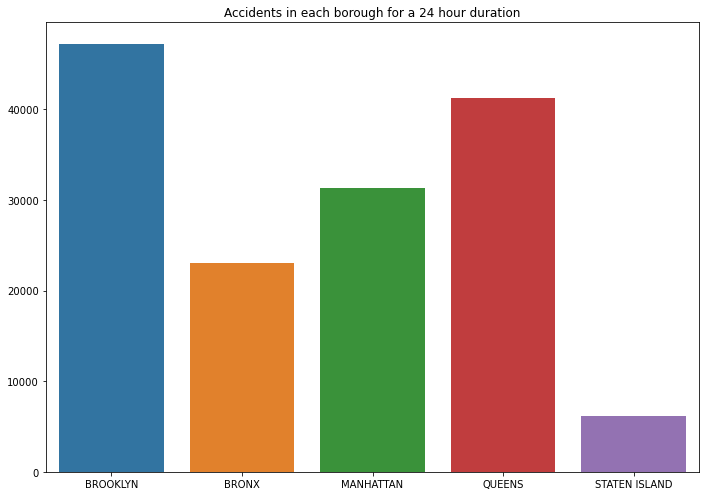

<Figure size 7200x1080 with 0 Axes>

In [38]:
# Plotting the number of accidents in each borough in each of the 24 hours
y_num_accidents = borough_whole_24
x_borough_names = individual_boroughs

#setting dimensions of the plot
AXdims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=AXdims)

sns.barplot(x_borough_names, y_num_accidents, ax=ax)
plt.title("Accidents in each borough for a 24 hour duration")
plt.figure(figsize=(100, 15))
plt.show()

## **Analysis of Accidents in each borough for an entire 24 hour period:**
>This graphs shows the number of accidents in each borough over the span of 24 hours. From the graph, we observed that Brooklyn has the highest number of accidents and Staten Island has the lowest number of accidents. We can also observe that Queens has the second most number of accidents, followed by Manhattan and then the Bronx.

> *Even in this general graph we see the pattern that:*

>Queens is the biggest borough of the 5 boroughs, but it has the second most number of accidents.
>Brooklyn has the most number of accdients even though it is the second largest borough of the 5 boroughs.
>Manhattan has the third most number of accidents even though it is the smallest of the 5 boroughs.
>Bronx has the four most number of accidents, and it is the fourth largest borough.
>Staten Island has the least amount of accidents even though it is the third largest borough.
>Again we see this pattern that Staten Island has significantly less accidents compared to the other borough and this is really intriguing, especially with the fact that Staten Island is the third largest borough. 


In [39]:
# Printing the number of accidents in each borough for each of the 24 hours

# Bronx:
accidents_bronx_by_hour = []
borough_is_bronx = accidents.loc[accidents['borough'] == 'BRONX']
for i in range(24):
    numHour = borough_is_bronx.loc[borough_is_bronx['hour_range'] == i]
    accidents_bronx_by_hour.append(numHour.shape[0])
print("NUMBER OF ACCIDENTS IN THE BRONX BY HOUR: {} ".format(accidents_bronx_by_hour))

# Queens
accidents_queens_by_hour = []
borough_is_queens = accidents.loc[accidents['borough'] == 'QUEENS']
for i in range(24):
    numHour = borough_is_queens.loc[borough_is_queens['hour_range'] == i]
    accidents_queens_by_hour.append(numHour.shape[0])
print("NUMBER OF ACCIDENTS IN THE QUEENS BY HOUR: {} ".format(accidents_queens_by_hour))

# Manhattan
accidents_manhattan_by_hour = []
borough_is_manhattan = accidents.loc[accidents['borough'] == 'MANHATTAN']
for i in range(24):
    numHour = borough_is_manhattan.loc[borough_is_manhattan['hour_range'] == i]
    accidents_manhattan_by_hour.append(numHour.shape[0])
print("NUMBER OF ACCIDENTS IN MANHATTAN BY HOUR: {} ".format(accidents_manhattan_by_hour))

# Brooklyn
accidents_brooklyn_by_hour = []
borough_is_brooklyn = accidents.loc[accidents['borough'] == 'BROOKLYN']
for i in range(24):
    numHour = borough_is_brooklyn.loc[borough_is_brooklyn['hour_range'] == i]
    accidents_brooklyn_by_hour.append(numHour.shape[0])
print("NUMBER OF ACCIDENTS IN BROOKLYN BY HOUR: {} ".format(accidents_brooklyn_by_hour))

# Staten Island
accidents_statenIsland_by_hour = []
borough_is_statenIsland = accidents.loc[accidents['borough'] == 'STATEN ISLAND']
for i in range(24):
    numHour = borough_is_statenIsland.loc[borough_is_statenIsland['hour_range'] == i]
    accidents_statenIsland_by_hour.append(numHour.shape[0])
print("NUMBER OF ACCIDENTS IN STATEN ISLAND BY HOUR: {} ".format(accidents_statenIsland_by_hour))

# The accident count for all of the boroughs for each of the 24 hours
accidents_all_boroughs_by_hour = []
for i in range(24):
    numHour = accidents.loc[accidents['hour_range'] == i]
    accidents_all_boroughs_by_hour.append(numHour.shape[0])
print("NUMBER OF ACCIDENTS ACROSS ALL 5 BOROUGHS BY HOUR: {} ".format(accidents_all_boroughs_by_hour))

NUMBER OF ACCIDENTS IN THE BRONX BY HOUR: [824, 329, 227, 213, 250, 314, 509, 880, 1406, 1391, 1048, 1140, 1307, 1291, 1543, 1565, 1793, 1679, 1415, 1151, 888, 722, 631, 493] 
NUMBER OF ACCIDENTS IN THE QUEENS BY HOUR: [1299, 498, 403, 374, 473, 541, 911, 1324, 2553, 2210, 1957, 2099, 2213, 2373, 2862, 2761, 3027, 3157, 2734, 2191, 1685, 1425, 1205, 943] 
NUMBER OF ACCIDENTS IN MANHATTAN BY HOUR: [1330, 627, 419, 370, 344, 360, 588, 818, 1424, 1682, 1715, 1873, 1837, 1939, 2186, 1947, 2058, 2009, 1785, 1556, 1266, 1181, 1097, 945] 
NUMBER OF ACCIDENTS IN BROOKLYN BY HOUR: [1593, 605, 430, 386, 435, 506, 862, 1385, 2608, 2543, 2413, 2592, 2765, 2829, 3348, 3235, 3611, 3529, 3074, 2357, 1961, 1665, 1388, 1112] 
NUMBER OF ACCIDENTS IN STATEN ISLAND BY HOUR: [135, 64, 45, 38, 44, 47, 111, 158, 336, 304, 315, 321, 402, 399, 529, 427, 567, 501, 421, 289, 250, 177, 155, 128] 
NUMBER OF ACCIDENTS ACROSS ALL 5 BOROUGHS BY HOUR: [5181, 2123, 1524, 1381, 1546, 1768, 2981, 4565, 8327, 8130, 7448, 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


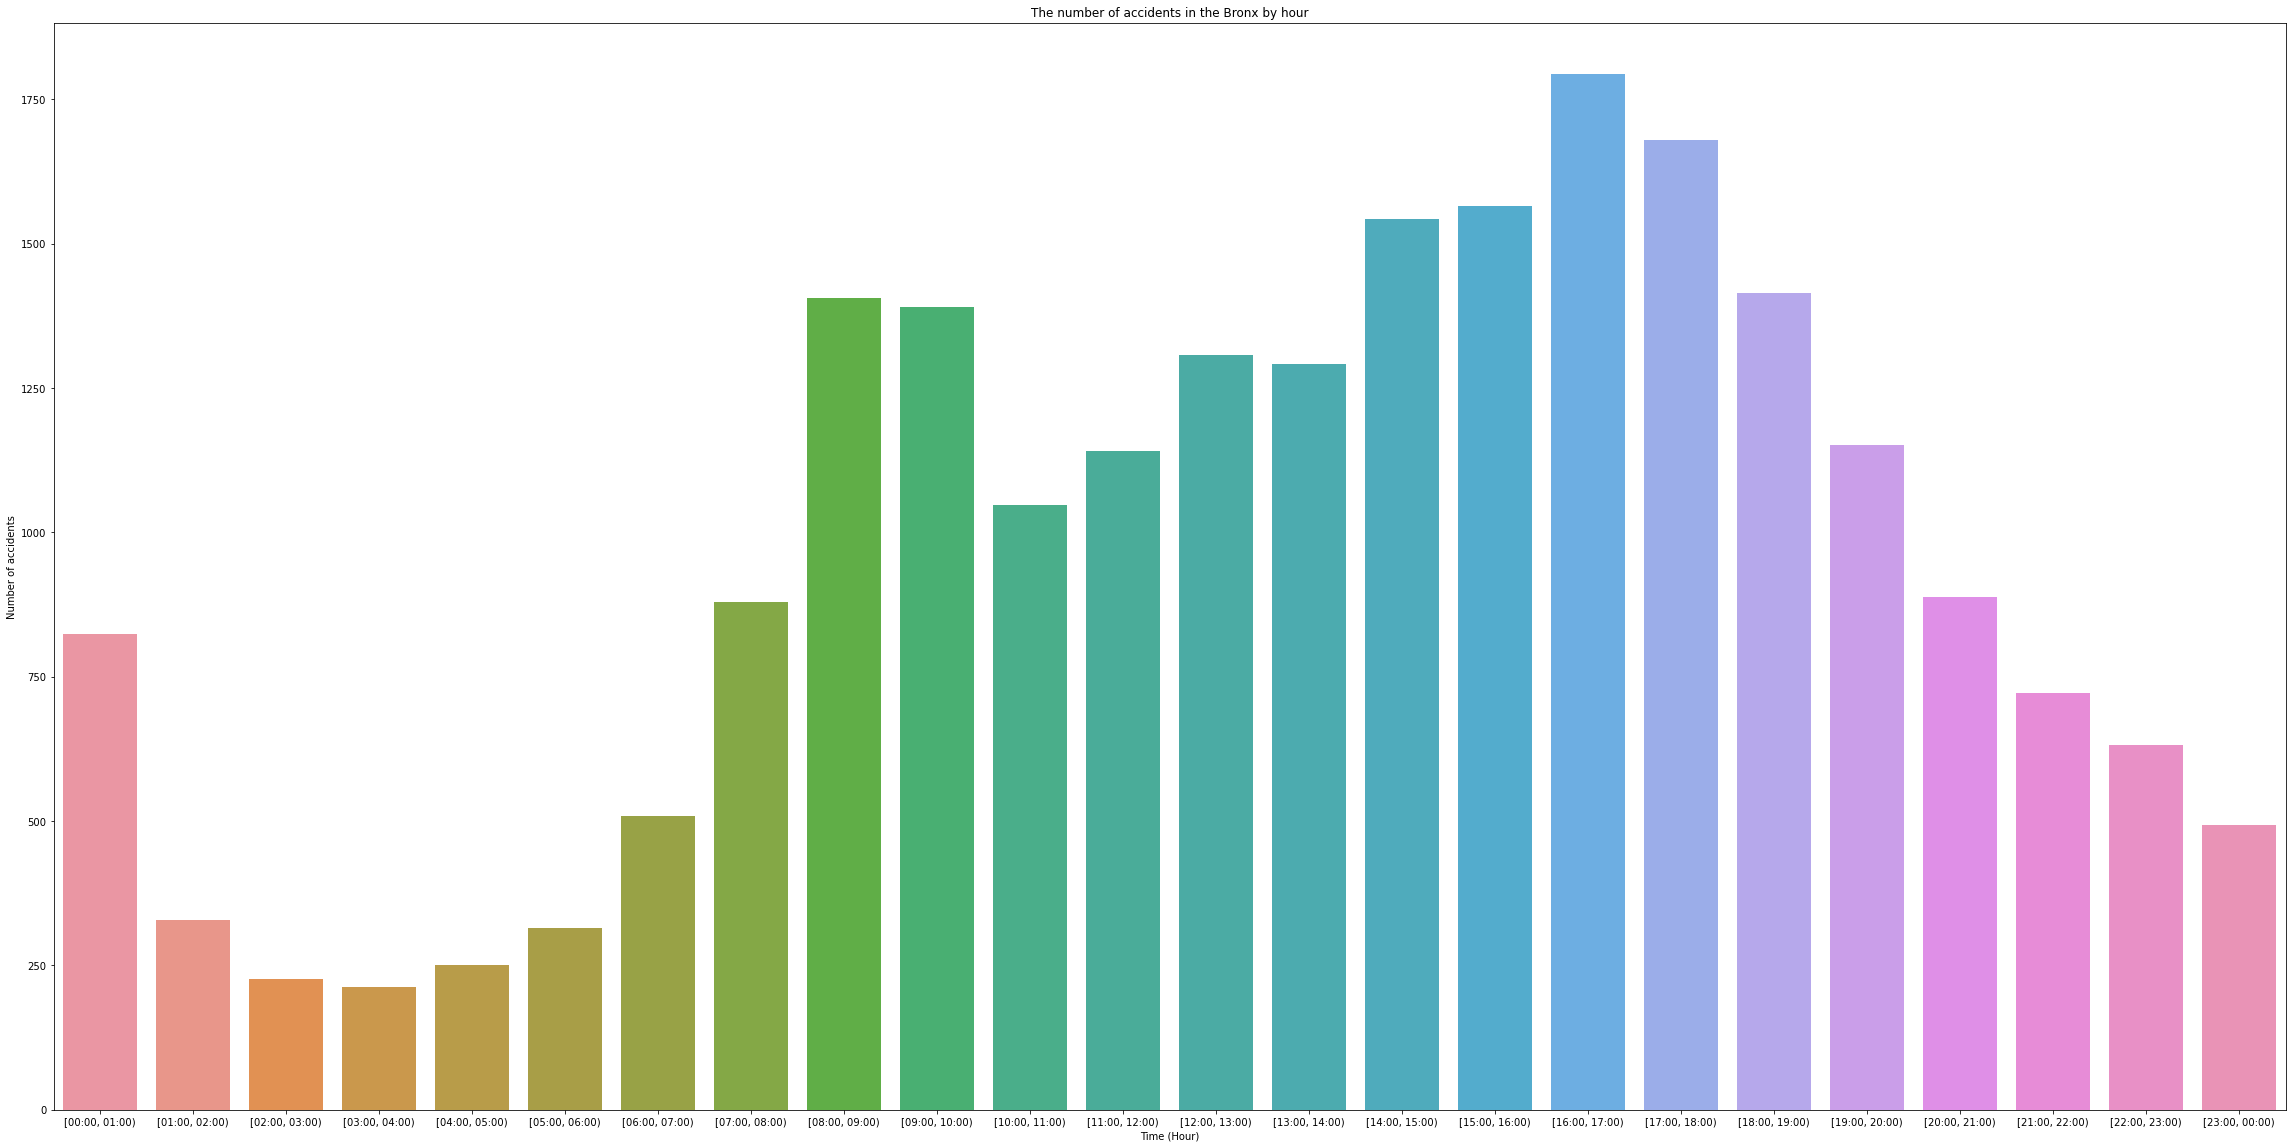

<Figure size 7200x1080 with 0 Axes>

In [40]:
# Creating a bar graph showing the number of accidents in each of the borough for each of the 24 hours

# Creating the label for the x axis of the graph:
hours = ['[00:00, 01:00)', '[01:00, 02:00)', '[02:00, 03:00)', '[03:00, 04:00)',
         '[04:00, 05:00)', '[05:00, 06:00)', '[06:00, 07:00)', '[07:00, 08:00)',
         '[08:00, 09:00)', '[09:00, 10:00)', '[10:00, 11:00)', '[11:00, 12:00)',
         '[12:00, 13:00)', '[13:00, 14:00)', '[14:00, 15:00)', '[15:00, 16:00)',
         '[16:00, 17:00)', '[17:00, 18:00)', '[18:00, 19:00)', '[19:00, 20:00)',
         '[20:00, 21:00)', '[21:00, 22:00)', '[22:00, 23:00)', '[23:00, 00:00)']

# BRONX
#setting dimensions of the plot
AXdims = (40, 20)
fig, ax = pyplot.subplots(figsize=AXdims)

sns.barplot(hours, accidents_bronx_by_hour, ax=ax)
plt.xlabel("Time (Hour)")
plt.ylabel("Number of accidents")
plt.title("The number of accidents in the Bronx by hour")
plt.figure(figsize=(100, 15))
plt.show()

## **Analysis of Accidents in the Bronx for an entire 24 hour period:**
>This graph shows the number of accidents in the Bronx for each of the 24 hours. The peek number of accidents occurs at around 4pm to 5pm. The minimum occurs around 3am to 4am. Most people are still asleep from 3am to 4am, thus it sort of intuitively make sense that this is when the number of accidents are the lowest. Most of the people work 9 to 5 jobs, thus it also make sense that the peek number of accidents happens around 4pm to 5pm.

>This graph shows us that there is a relationship between the time of day and the number of accidents that occur in the sense that the graph is showing us the pattern that less accidents occur during the night and more accidents occur during the day in the Bronx. 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


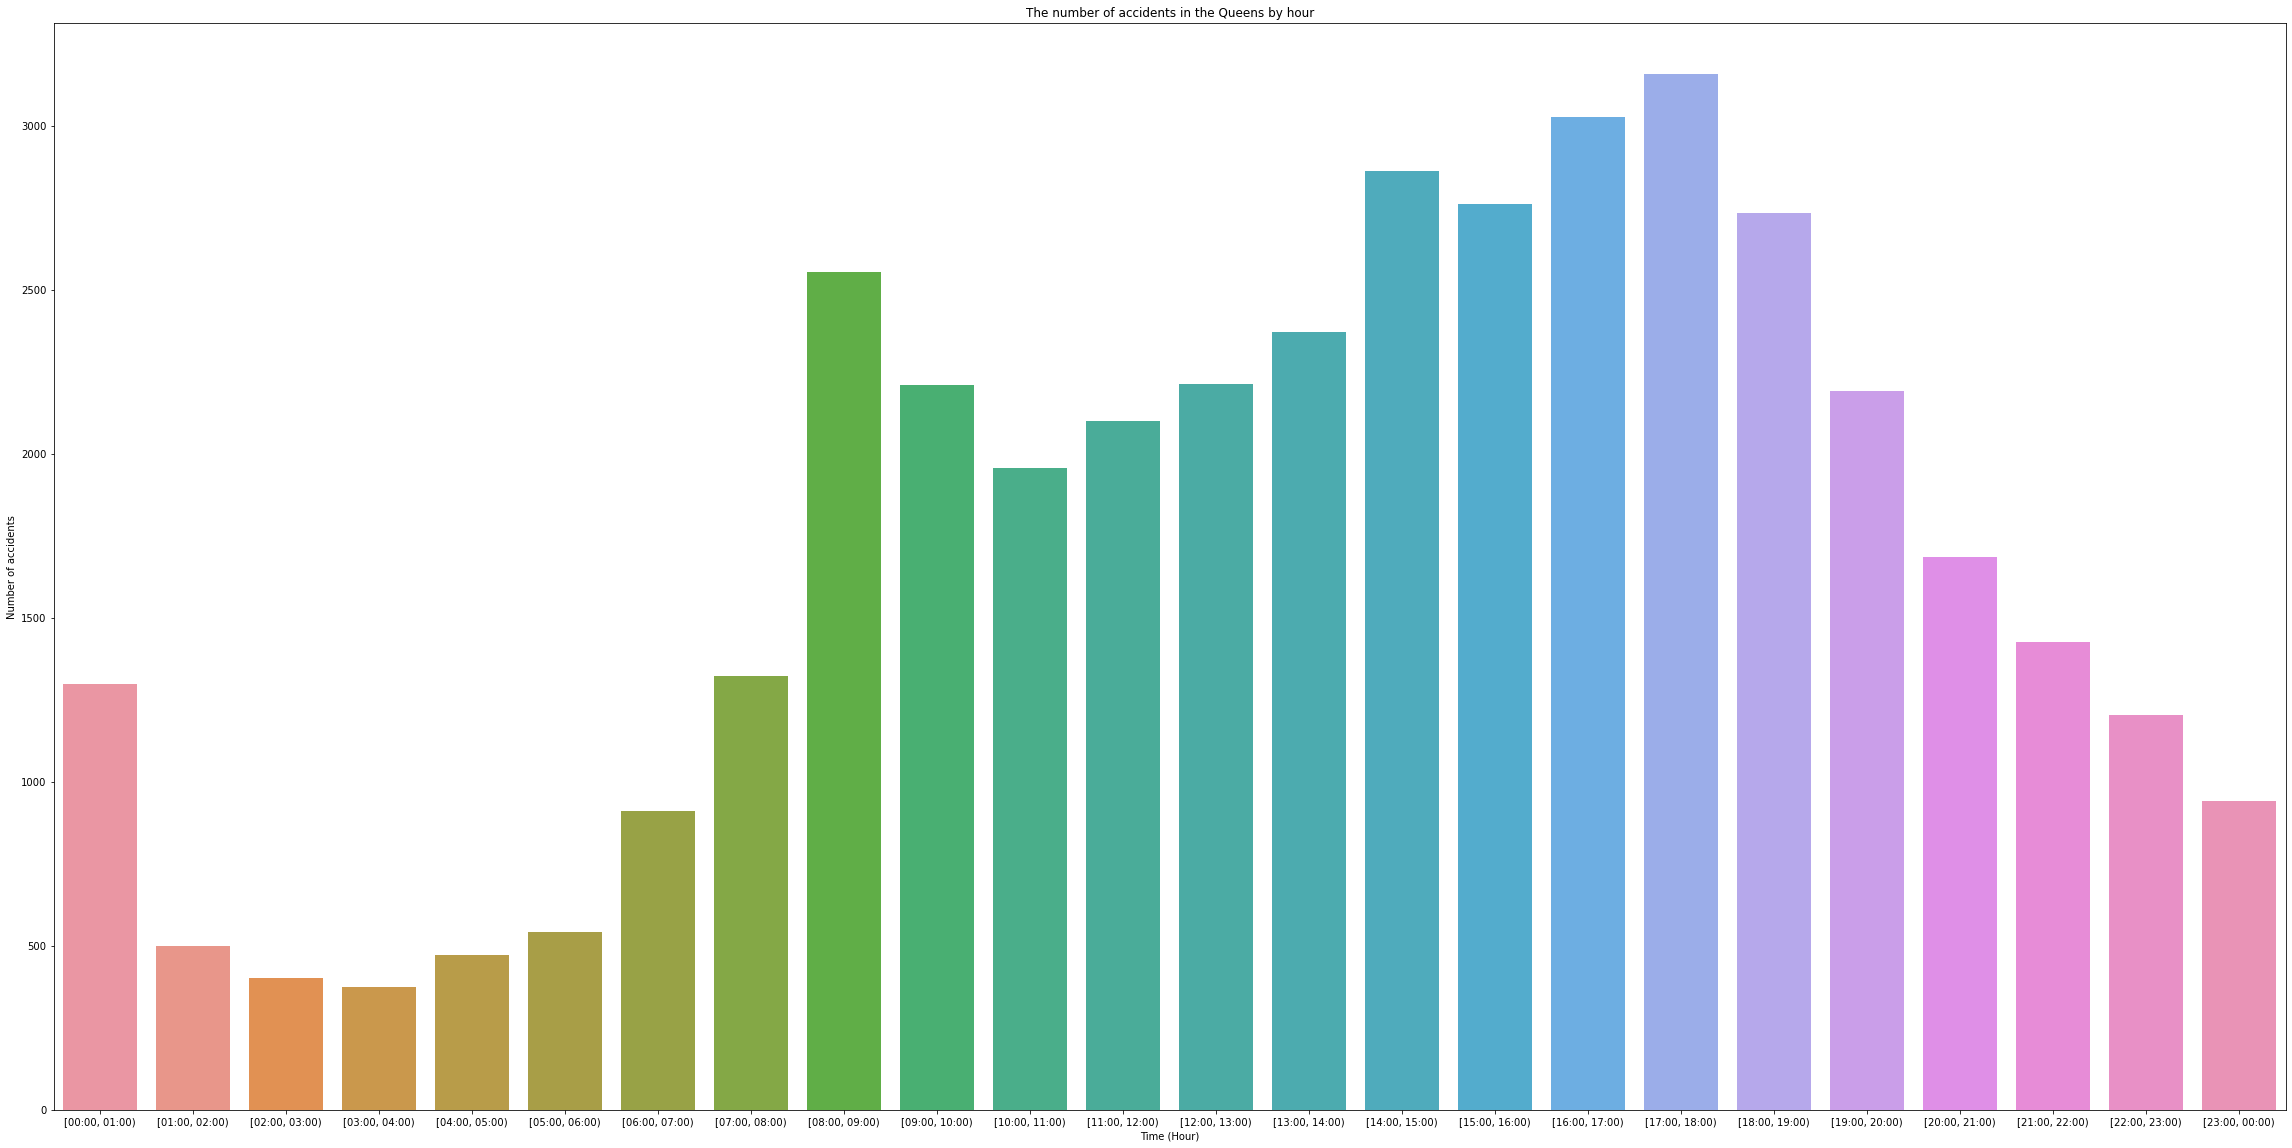

<Figure size 7200x1080 with 0 Axes>

In [41]:
# Creating a bar graph showing the number of accidents in each of the borough for each of the 24 hours
# QUEENS
#setting dimensions of the plot
AXdims = (40, 20)
fig, ax = pyplot.subplots(figsize=AXdims)

sns.barplot(hours, accidents_queens_by_hour, ax=ax)
plt.xlabel("Time (Hour)")
plt.ylabel("Number of accidents")
plt.title("The number of accidents in the Queens by hour")
plt.figure(figsize=(100, 15))
plt.show()

## **Analysis of Accidents in the Queens for an entire 24 hour period:**
>This graph shows the number of accidents in the Queens for each of the 24 hours. The peek number of accidents occurs at around 5pm to 6pm. The minimum occurs around 3am to 4am. Most people are still asleep from 3am to 4am, thus it sort of intuitively make sense that this is when the number of accidents are the lowest. Most of the people work 9 to 5 jobs, but in this graph for Queens, it shows that the peek occurs from 5pm to 6pm, so maybe people get off of work a bit later in Queens.

>This graph shows us that there is a relationship between the time of day and the number of accidents that occur in the sense that the graph is showing us the pattern that less accidents occur during the night and more accidents occur during the day in the Queen. 

>This graph solidified our hypothesis that there is a relationship between the time of day and the number of accidents. At the same time, we can also see that this relationship is not linear, because for one time of day is not a continuous variable in the way that we have used it to conduct our analysis. It is more of a categorical variable. 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


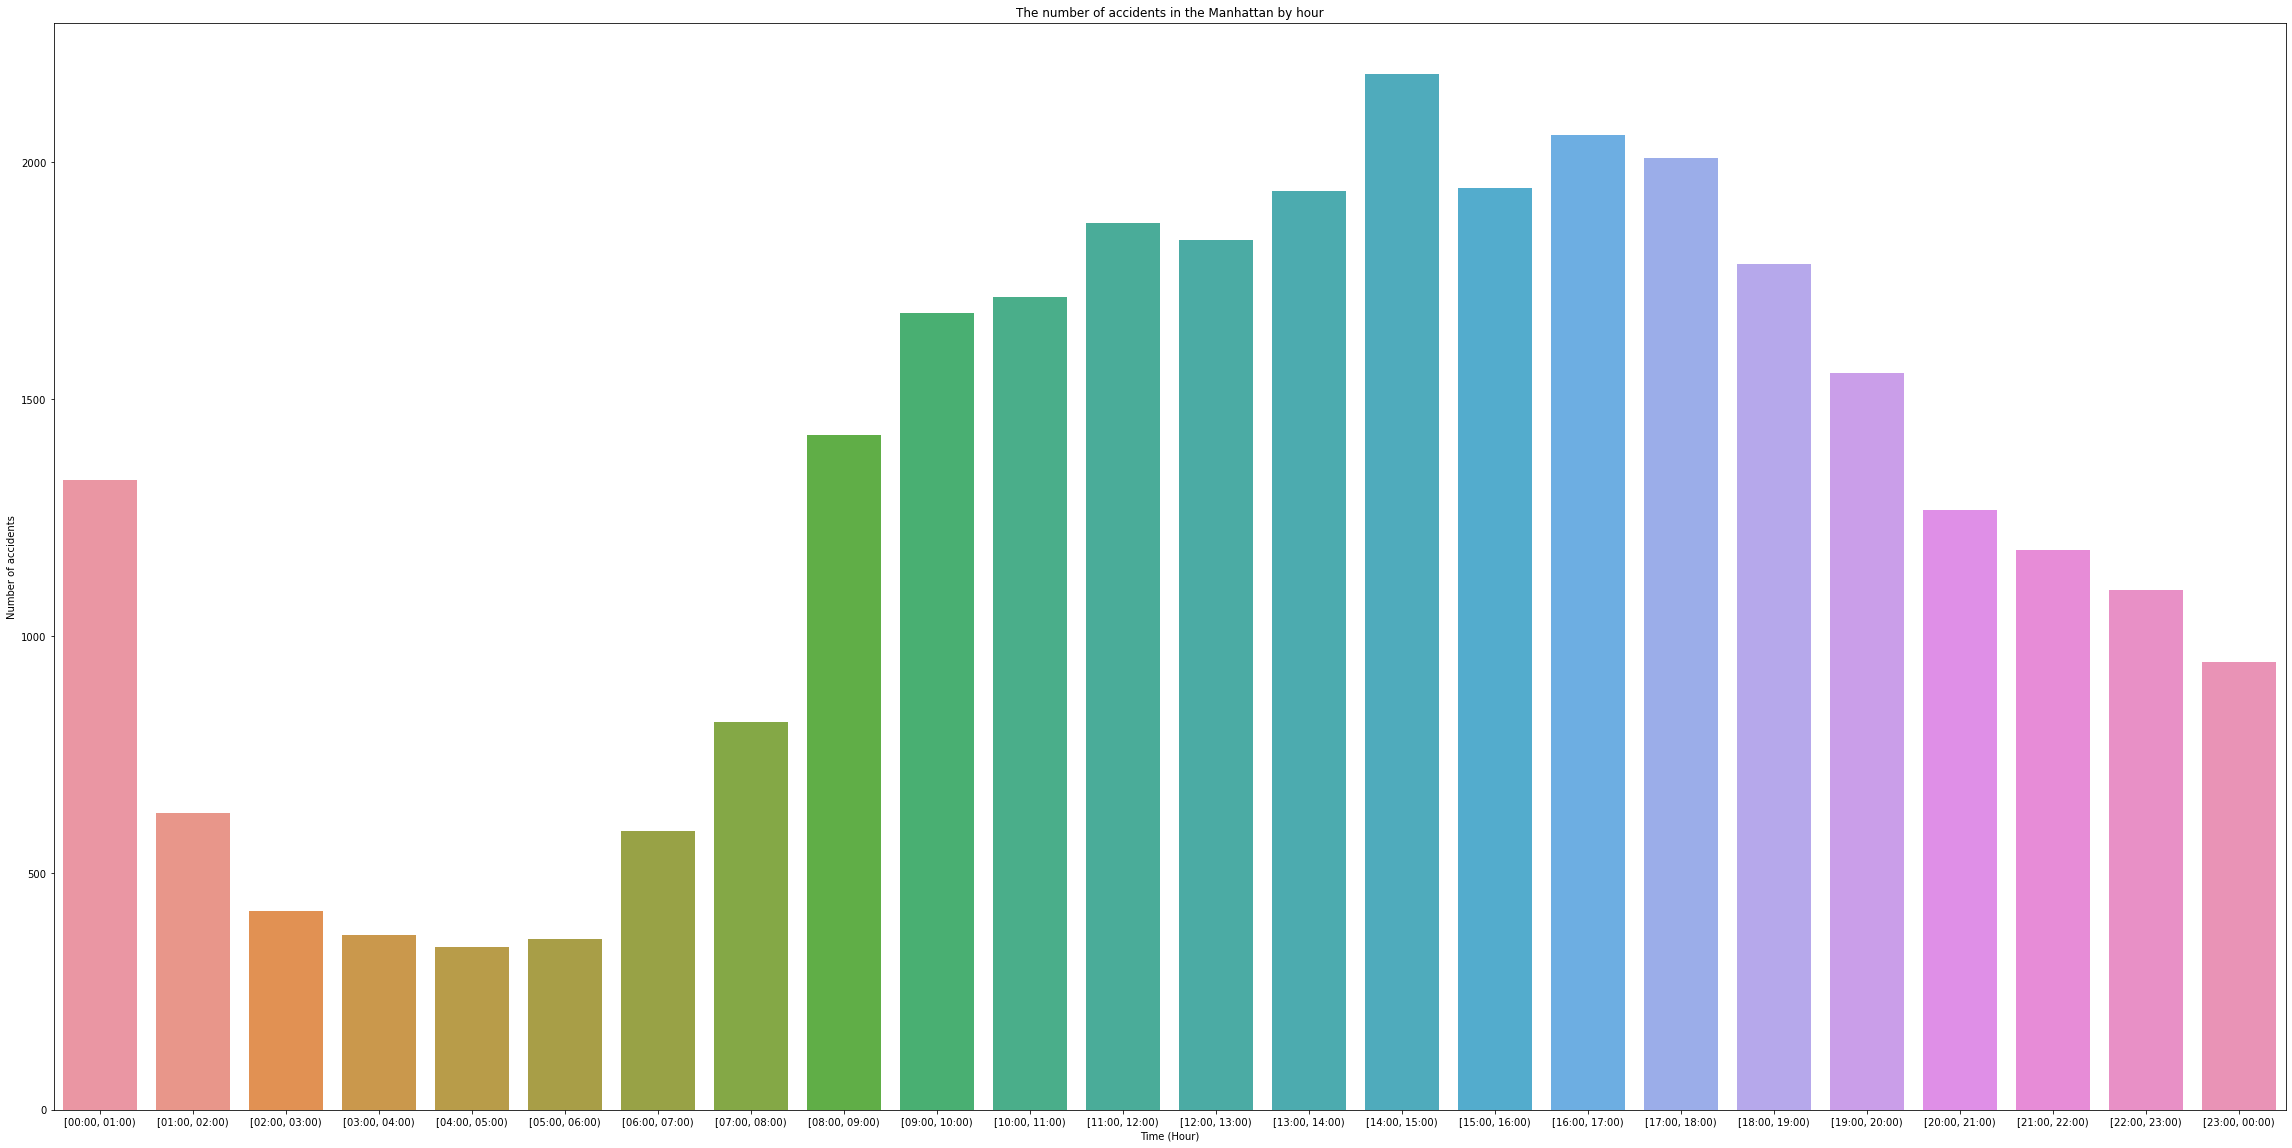

<Figure size 7200x1080 with 0 Axes>

In [42]:
# Creating a bar graph showing the number of accidents in each of the borough for each of the 24 hours
# MANHATTAN
#setting dimensions of the plot
AXdims = (40, 20)
fig, ax = pyplot.subplots(figsize=AXdims)

sns.barplot(hours, accidents_manhattan_by_hour, ax=ax)
plt.xlabel("Time (Hour)")
plt.ylabel("Number of accidents")
plt.title("The number of accidents in the Manhattan by hour")
plt.figure(figsize=(100, 15))
plt.show()

## **Analysis of Accidents in the Manhattan for an entire 24 hour period:**
>This graph shows the number of accidents in the Manhattan for each of the 24 hours. The peek number of accidents occurs at around 2pm to 3pm. The minimum occurs around 4am to 5am. Most people are still asleep from 4am to 5am, thus it sort of intuitively make sense that this is when the number of accidents are the lowest. Most of the people work 9 to 5 jobs, but the peek occurs in this graph from 2pm to 3pm, and this could be due to the fact that most students in Manhattan get out at around 2pm to 3pm. Students utilize many form of transportation to get to where they need to, such as parents driving them, uber, lyft, and etc.

>This graph shows us that there is a relationship between the time of day and the number of accidents that occur in the sense that the graph is showing us the pattern that less accidents occur during the night and more accidents occur during the day in the Manhattan. 

>This graph again solidifies our hypothesis that there is a relationship between the time of day and the number of accidents. 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


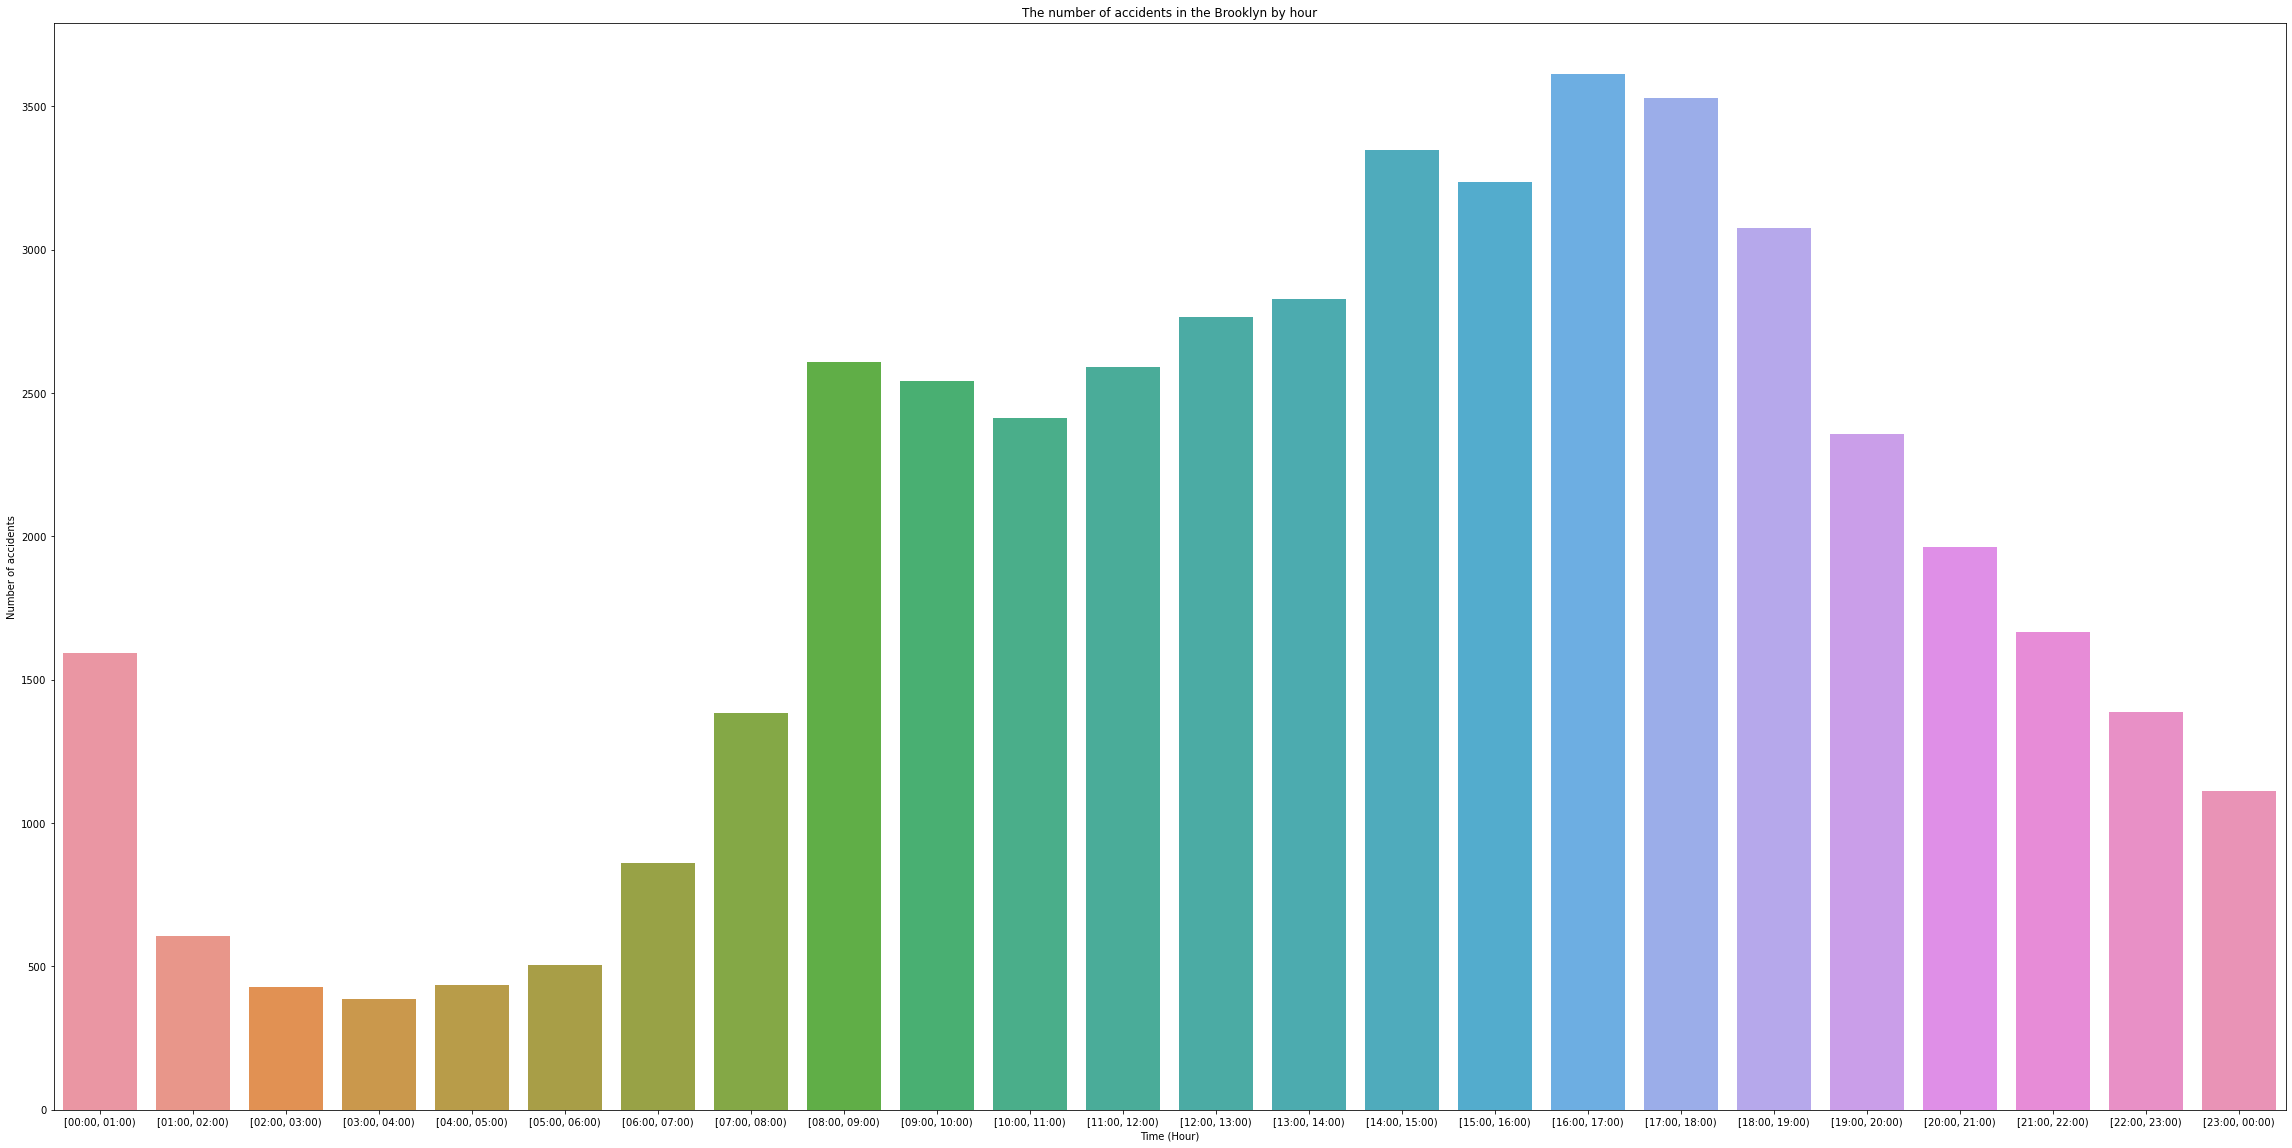

<Figure size 7200x1080 with 0 Axes>

In [43]:
# Creating a bar graph showing the number of accidents in each of the borough for each of the 24 hours
# BROOKLYN
#setting dimensions of the plot
AXdims = (40, 20)
fig, ax = pyplot.subplots(figsize=AXdims)

sns.barplot(hours, accidents_brooklyn_by_hour, ax=ax)
plt.xlabel("Time (Hour)")
plt.ylabel("Number of accidents")
plt.title("The number of accidents in the Brooklyn by hour")
plt.figure(figsize=(100, 15))
plt.show()

## **Analysis of Accidents in the Brooklyn for an entire 24 hour period:**
>This graph shows the number of accidents in the Brooklyn for each of the 24 hours. The peek number of accidents occurs at around 4pm to 5pm. The minimum occurs around 3am to 4am. Most people are still asleep from 3am to 4am, thus it sort of intuitively make sense that this is when the number of accidents are the lowest. Most of the people work 9 to 5 jobs, thus it also make sense that the peek number of accidents happens around 4pm to 5pm.

>This graph shows us that there is a relationship between the time of day and the number of accidents that occur in the sense that the graph is showing us the pattern that less accidents occur during the night and more accidents occur during the day in the Brooklyn. 

>This graph combined with all of the previous graphs that analyzed the relationship between time and the number of accidents in each borough again solidifies our hypothesis that there is a relationship between the time of day and the number of accidents. 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


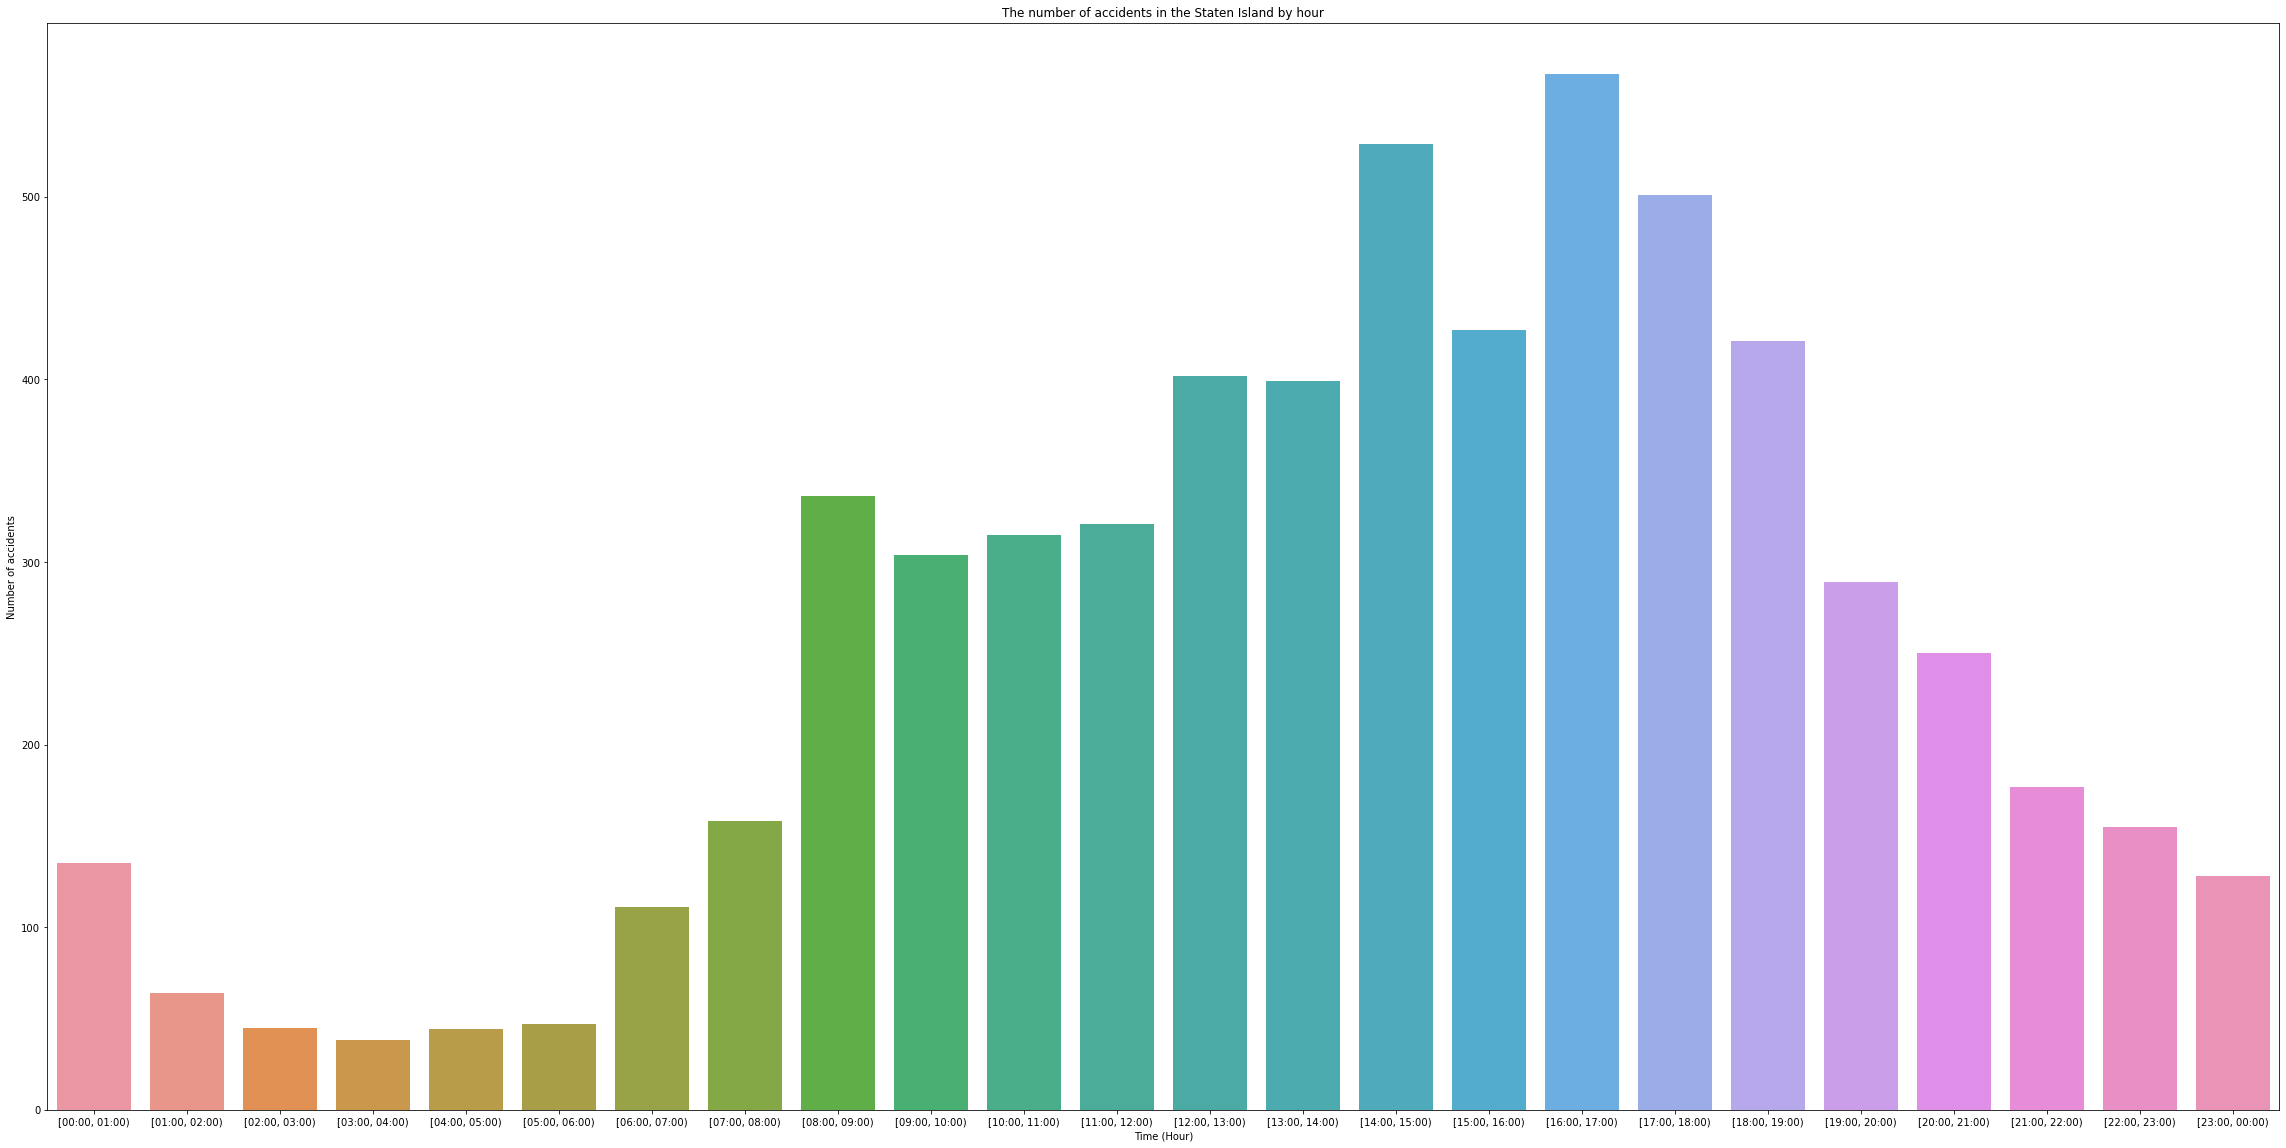

<Figure size 7200x1080 with 0 Axes>

In [44]:
# Creating a bar graph showing the number of accidents in each of the borough for each of the 24 hours
# STATEN ISLAND
#setting dimensions of the plot
AXdims = (40, 20)
fig, ax = pyplot.subplots(figsize=AXdims)

sns.barplot(hours, accidents_statenIsland_by_hour, ax=ax)
plt.xlabel("Time (Hour)")
plt.ylabel("Number of accidents")
plt.title("The number of accidents in the Staten Island by hour")
plt.figure(figsize=(100, 15))
plt.show()

## **Analysis of Accidents in the Staten Island for an entire 24 hour period:**
>This graph shows the number of accidents in Staten Island for each of the 24 hours. The peek number of accidents occurs at around 4pm to 5pm. The minimum occurs around 3am to 4am. Most people are still asleep from 3am to 4am, thus it sort of intuitively make sense that this is when the number of accidents are the lowest. Most of the people work 9 to 5 jobs, thus it also make sense that the peek number of accidents happens around 4pm to 5pm.

>This graph shows us that there is a relationship between the time of day and the number of accidents that occur in the sense that the graph is showing us the pattern that less accidents occur during the night and more accidents occur during the day in the Staten Island. 

>Along with the graphs that we have analyzed for the four other boroughs, we analyzed that the relationship between time and the number of accidents in each borough again solidifies our hypothesis that there is a relationship between the time of day and the number of accidents. 

>In this graph, we can also see that the amount of accidents are significantly less compared to the number of accidents that occur in the other boroughs over the span of 24 hours and that is the reason for why the shape of this graph is not as will defined compared to that of the other graphs that we have analyzed thus far, but nonetheless we can still see the common pattern that there is a clear maximum point and there is also a clear minimum point.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


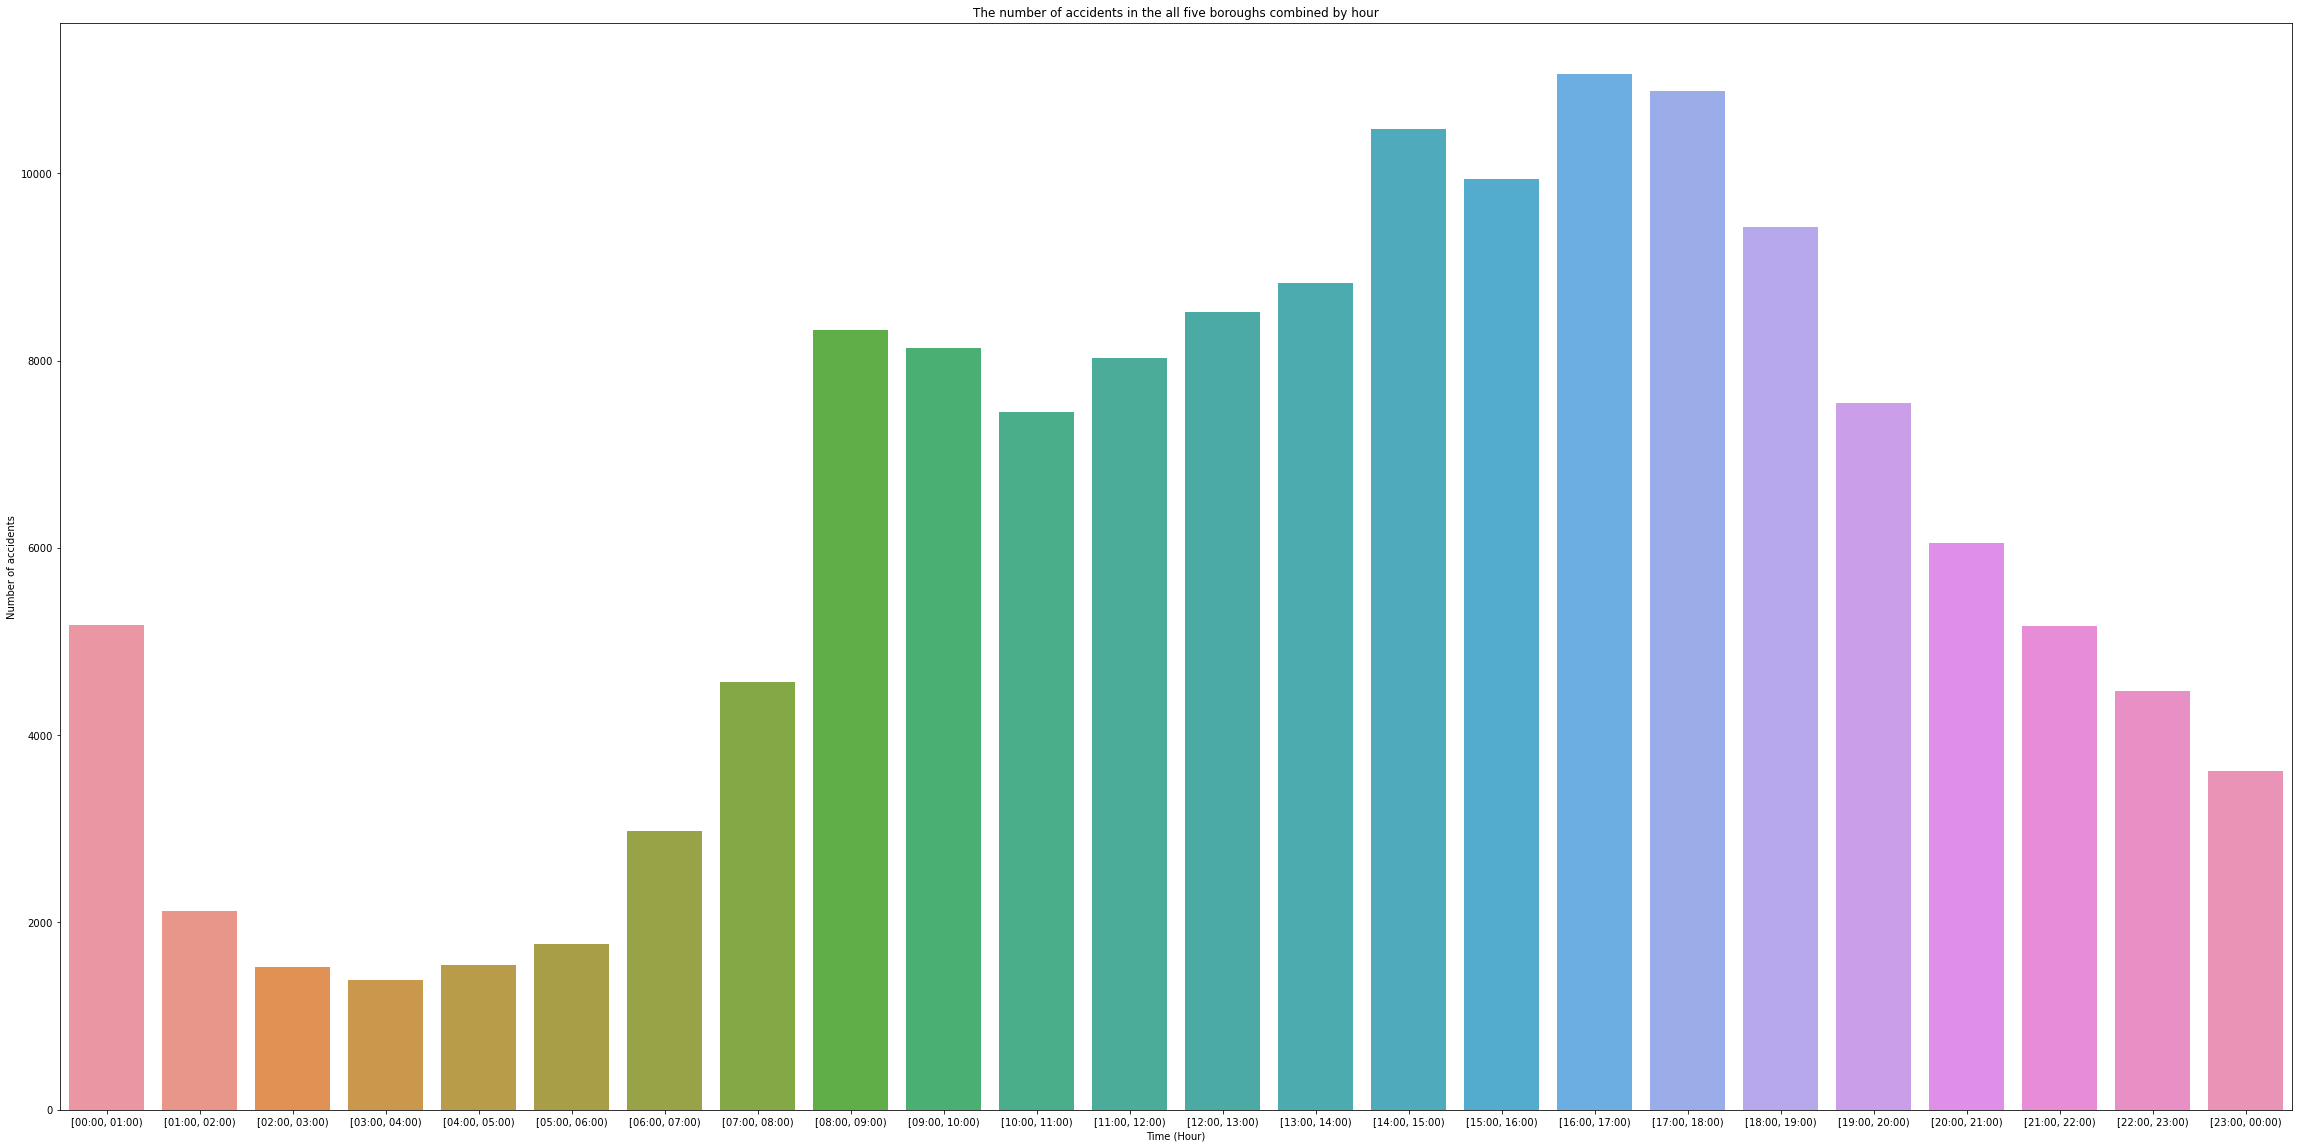

<Figure size 7200x1080 with 0 Axes>

In [45]:
# Creating a bar graph showing the number of accidents in each of the borough for each of the 24 hours
# All 5 boroughs
#setting dimensions of the plot
AXdims = (40, 20)
fig, ax = pyplot.subplots(figsize=AXdims)

sns.barplot(hours, accidents_all_boroughs_by_hour, ax=ax)
plt.xlabel("Time (Hour)")
plt.ylabel("Number of accidents")
plt.title("The number of accidents in the all five boroughs combined by hour")
plt.figure(figsize=(100, 15))
plt.show()

## **Analysis of Accidents in all of the boroughs for an entire 24 hour period:**
>This graph shows the number of accidents in all of the boroughs combined for each of the 24 hours. The peek number of accidents occurs at around 4pm to 5pm. The minimum occurs around 3am to 4am. Most people are still asleep from 3am to 4am, thus it sort of intuitively make sense that this is when the number of accidents are the lowest. Most of the people work 9 to 5 jobs, thus it also make sense that the peek number of accidents happens around 4pm to 5pm. This general trend so of assured us of our logical reasoning for the pattern that we observed in our graph.

>This graphs shape connects to the shape of all of the other graphs that we have analyzed thus far(specifically speaking, the graph for each borough showing the number of accidents that occur in each of the 24 hour periods. The maximum point and the minimum point happens at around the same time in this graph compared to the graphs that we have created for each of the individual boroughs, and this just confirms the fact that there is a relationship that exists between the time of day and the number of accidents that occur. We not only see that relationship in this combined graph, but we also see this relationship in the individual borough graph, and the bigger meaning of this is that in New York City as a whole, there exists a time period in which the most number of accidents occur in the 5 boroughs and there also exists a time period in which the least number of accidents occur in the 5 boroughs and they all occur concurrently.

>With this data at hand, we can suggest to the government body of New York City when to employ more officers to the street of New York City to facilitate traffic, thus decreasing the number of accident that occur.

In [46]:
# Calculating the total number of people killed/injured for each of the 24 hours
killed = []
injured = []
for i in range(24):
    numHour = accidents[accidents['hour_range'] == i]
    killed.append(numHour['killed'].sum())
    injured.append(numHour['injured'].sum())
    
print("The number of people killed by the hour:")
print(killed)
print("\n")
print("The number of people injured by the hour:")
print(injured)
print("\n")

The number of people killed by the hour:
[5.0, 2.0, 3.0, 4.0, 1.0, 5.0, 7.0, 8.0, 4.0, 1.0, 6.0, 6.0, 4.0, 7.0, 8.0, 7.0, 8.0, 5.0, 10.0, 4.0, 9.0, 10.0, 7.0, 8.0]


The number of people injured by the hour:
[1426.0, 602.0, 433.0, 469.0, 479.0, 492.0, 804.0, 1147.0, 1905.0, 1640.0, 1359.0, 1515.0, 1848.0, 1785.0, 2393.0, 2539.0, 2575.0, 2710.0, 2586.0, 2147.0, 1823.0, 1734.0, 1411.0, 1201.0]




C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


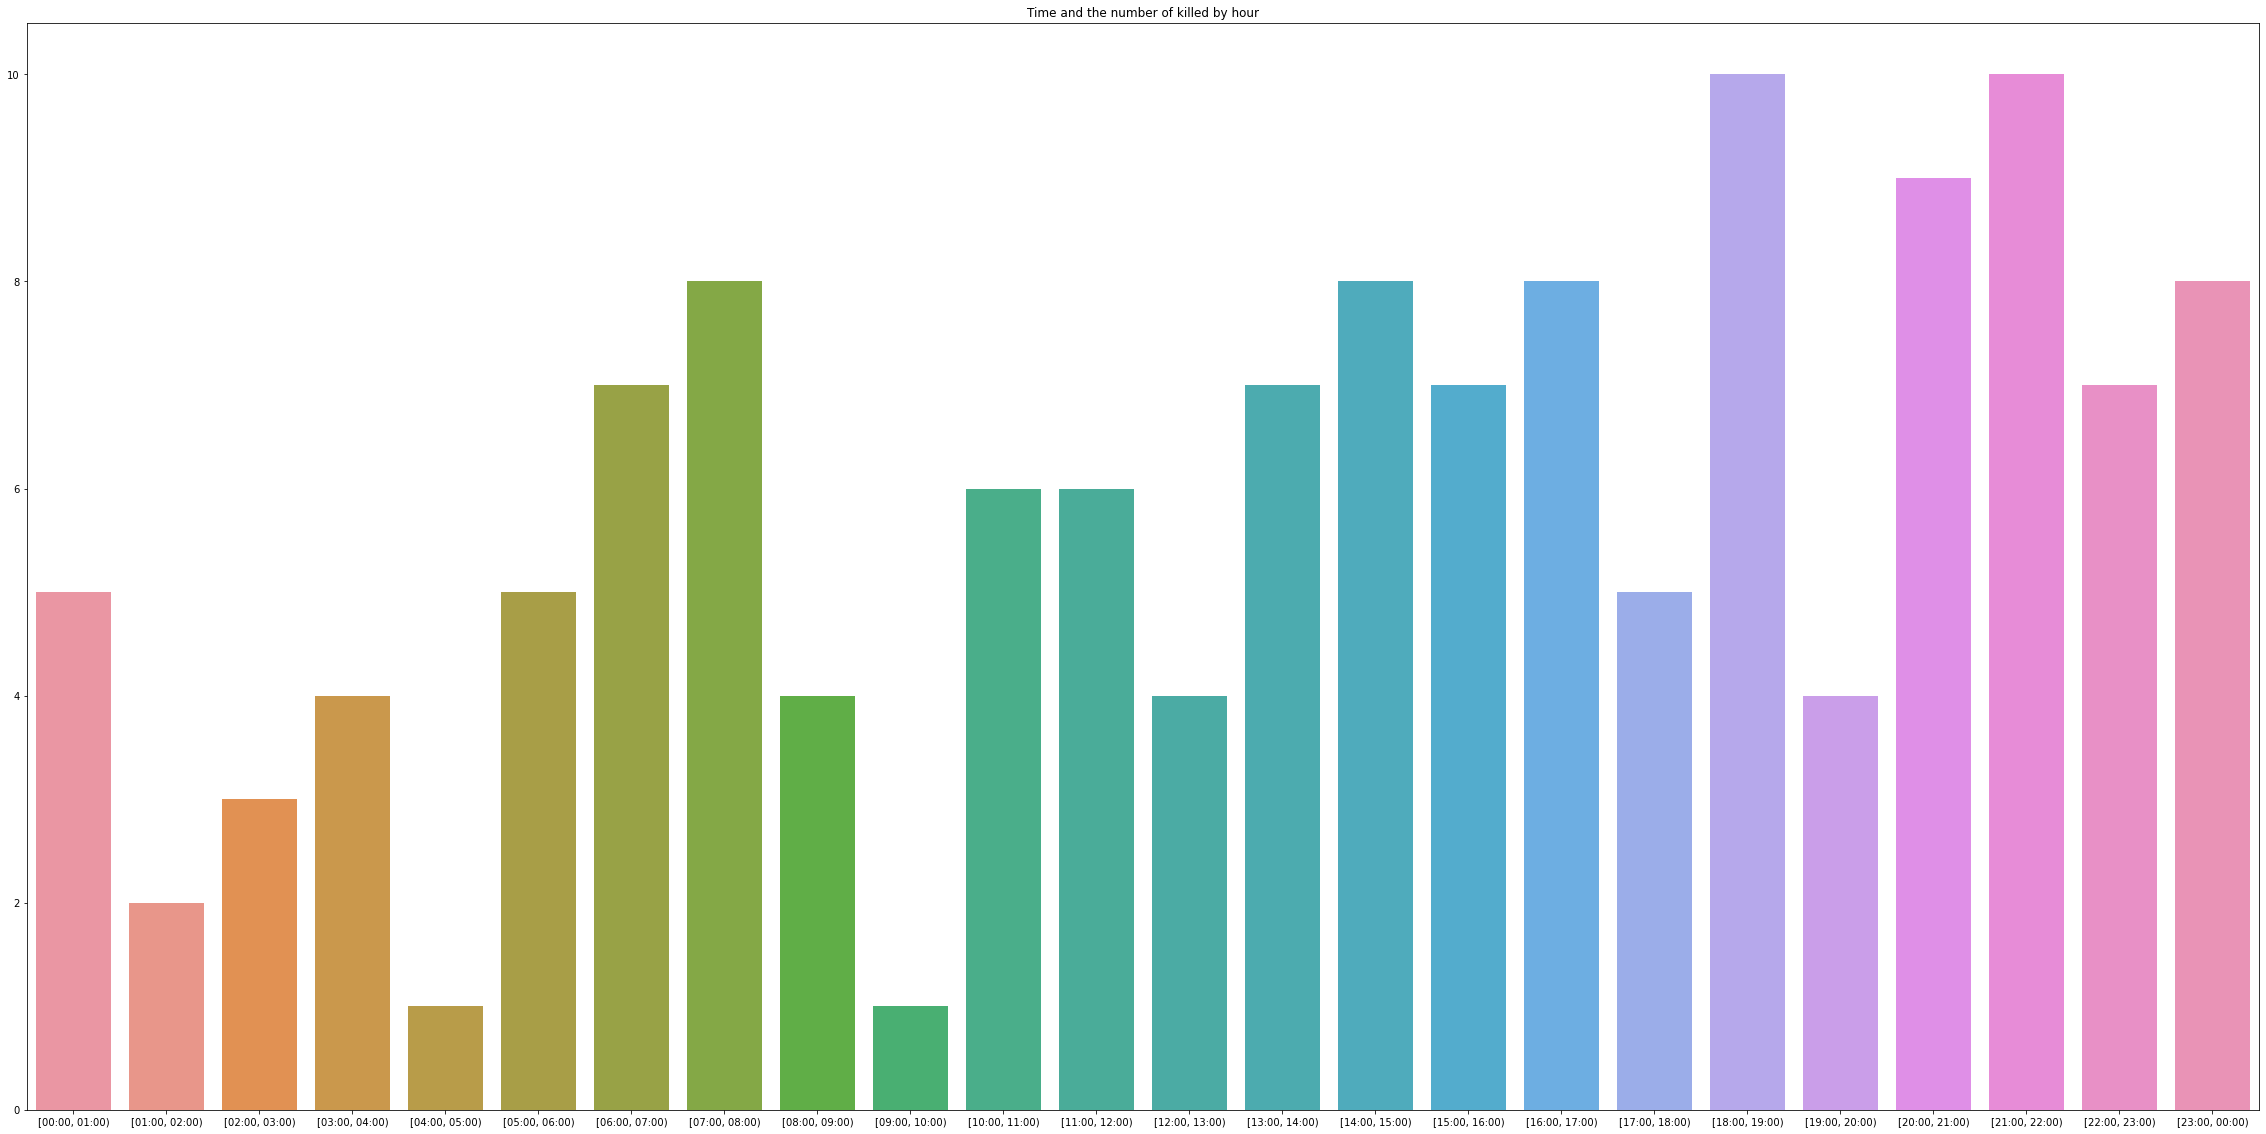

<Figure size 7200x1080 with 0 Axes>

In [47]:
# Plotting the total number of people killed in each of the 24 hours (All boroughs combined)
#setting dimensions of the plot
AXdims = (40, 20)
fig, ax = pyplot.subplots(figsize=AXdims)

sns.barplot(hours, killed, ax=ax)
plt.title("Time and the number of killed by hour")
plt.figure(figsize=(100, 15))
plt.show()

## **Analysis of time of day and the number of people killed by hour for an entire 24 hour period:**
>This graph shows the number of people killed in traffic related accidents for each of the 24 hours, with all of the boroughs combined. The are two peaks in this graph. The first peek occurs at 6pm to 7pm and the second peak occurs at 9pm to 10pm. The sort of means that the number of people killed in traffic related accidents tend to be higher at night, right before the time that most people tend to go to sleep.

>Although there is no clear trend that shows that there is a clear relationship between the time of day and the total number of people killed within each hour, we can see that the max number of people killed from accidents peak at around the same time that the most number of accidents occur during the day which is around 4pm to 5pm. This somewhat makes sense because when the max number of accidents occur, you would normally expect the max number of people killed to occur, but just to reiterate the point that our group just made, we cannot state a clear relationship between the time of day and the total number of people killed within each hour from this graph.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


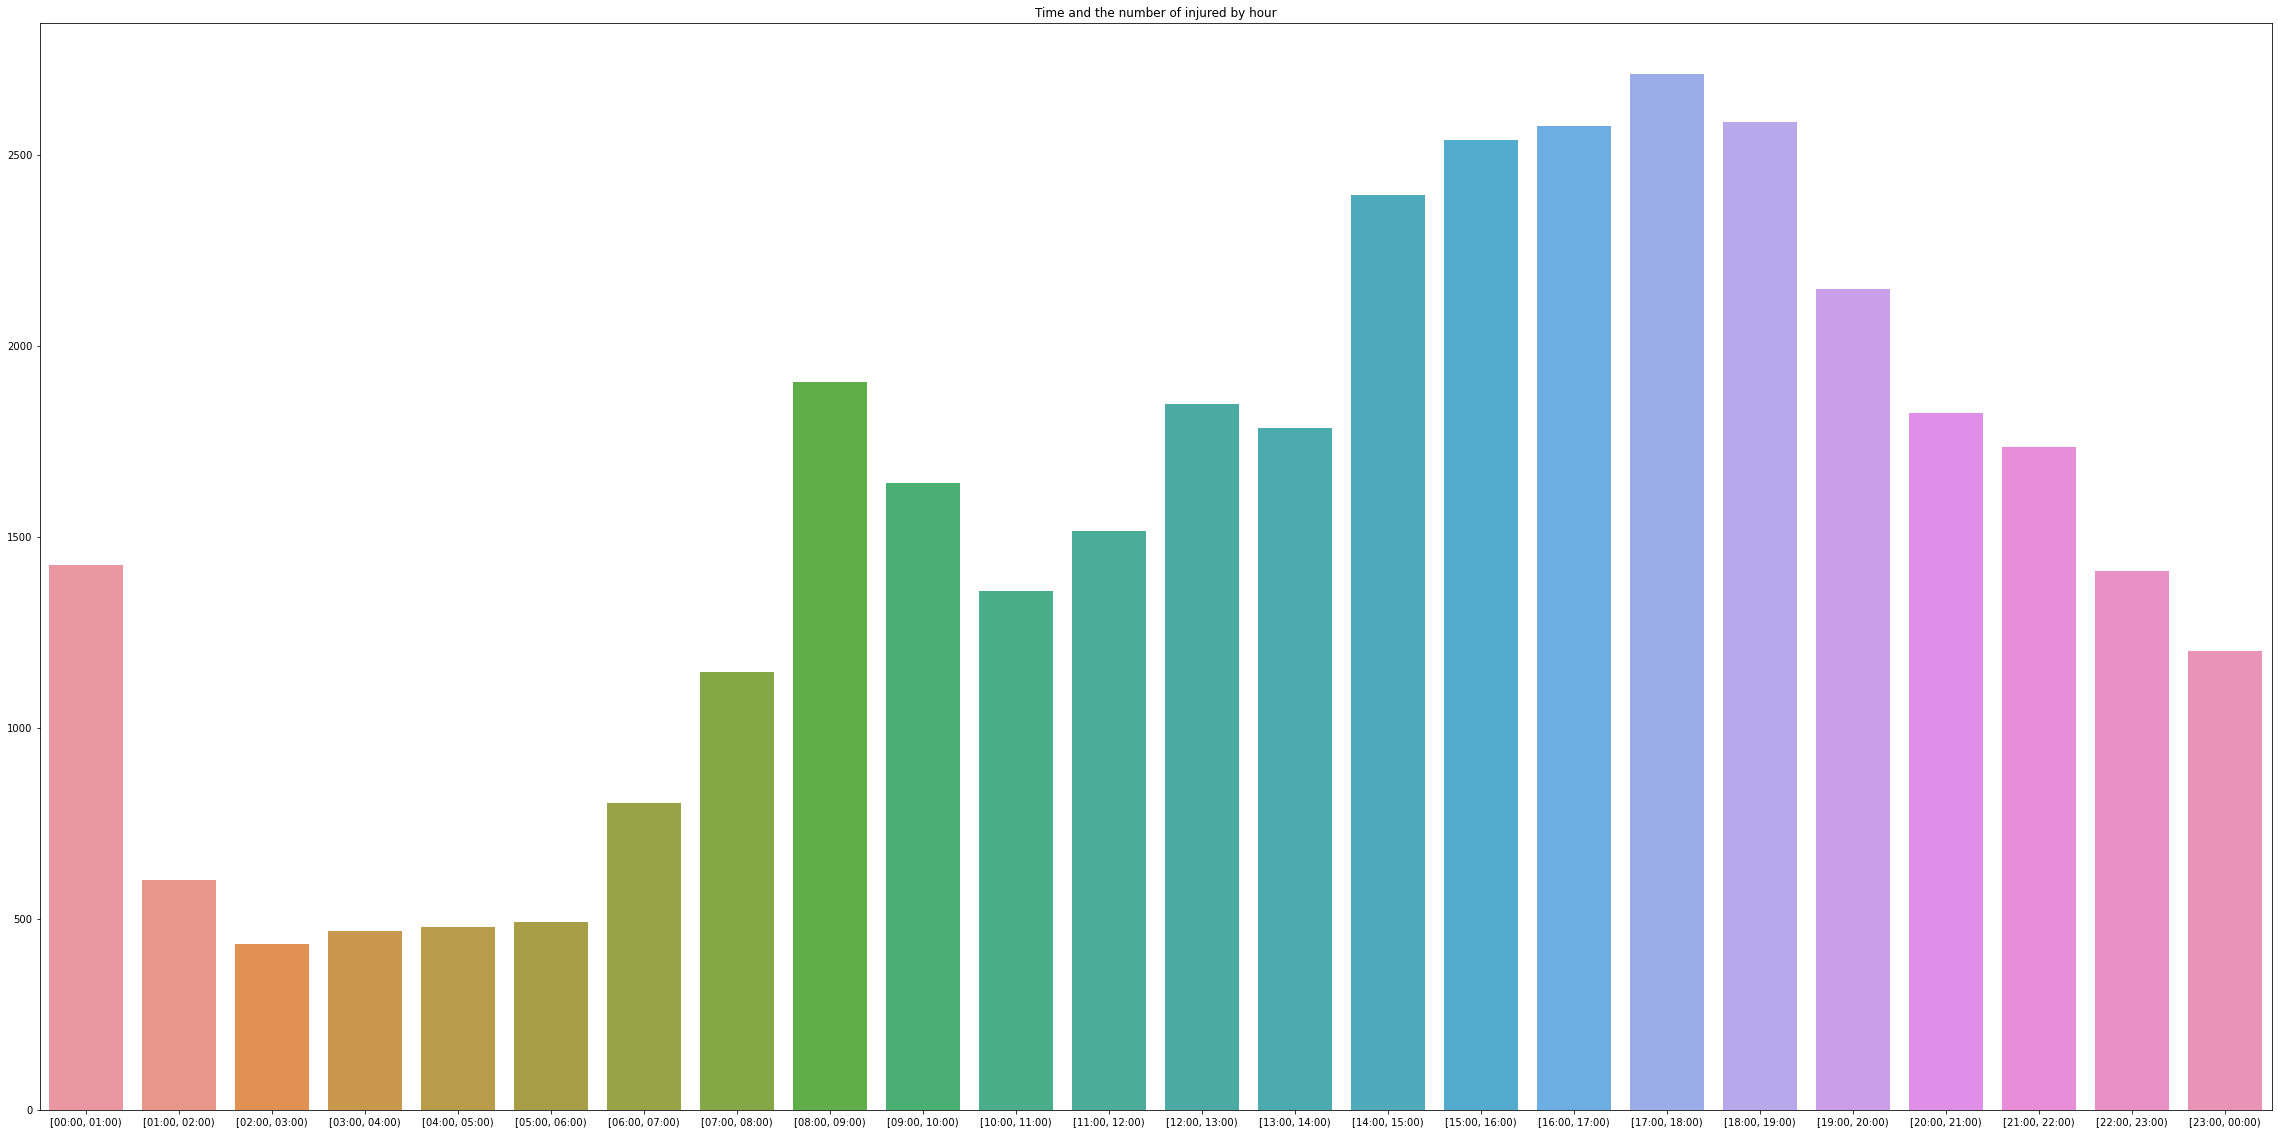

<Figure size 7200x1080 with 0 Axes>

In [48]:
# Plotting the total number of people injured in each of the 24 hours (All boroughs combined)
#setting dimensions of the plot
AXdims = (40, 20)
fig, ax = pyplot.subplots(figsize=AXdims)

sns.barplot(hours, injured, ax=ax)
plt.title("Time and the number of injured by hour")
plt.figure(figsize=(100, 15))
plt.show()

## **Analysis of time of day and the number of people injured by hour for an entire 24 hour period:**

>This graph shows the number of people injured in traffic related accidents for each of the 24 hours, with all of the boroughs combined. The are two peaks in this graph. There is one peek in the graph and it occured from 5pm to 6pm. There is also one minimum that occurs at 2am to 3 am.

>This pattern is similar to the graph where we plotted the number of accidents for all of the boroughs combined for each of the 24 hours. This observation make sense logically, because when accidents occur, most of the time people are injured.

>Though in the previous graph when we analyze the time versus the number of people killed in accidents, we were unable to derive any conclusions from the graph, in the graph we can clearly see a pattern. This graph take on a very similar shape compared to our graph where we analyzed the number Accidents in all of the boroughs for an entire 24 hour period. Again to reiterate our point above, this graph makes logic sense because of the fact that in most accidents, most of the time someone gets hurt.

<AxesSubplot:title={'center':'Location of Crashes'}, xlabel='longitude', ylabel='latitude'>

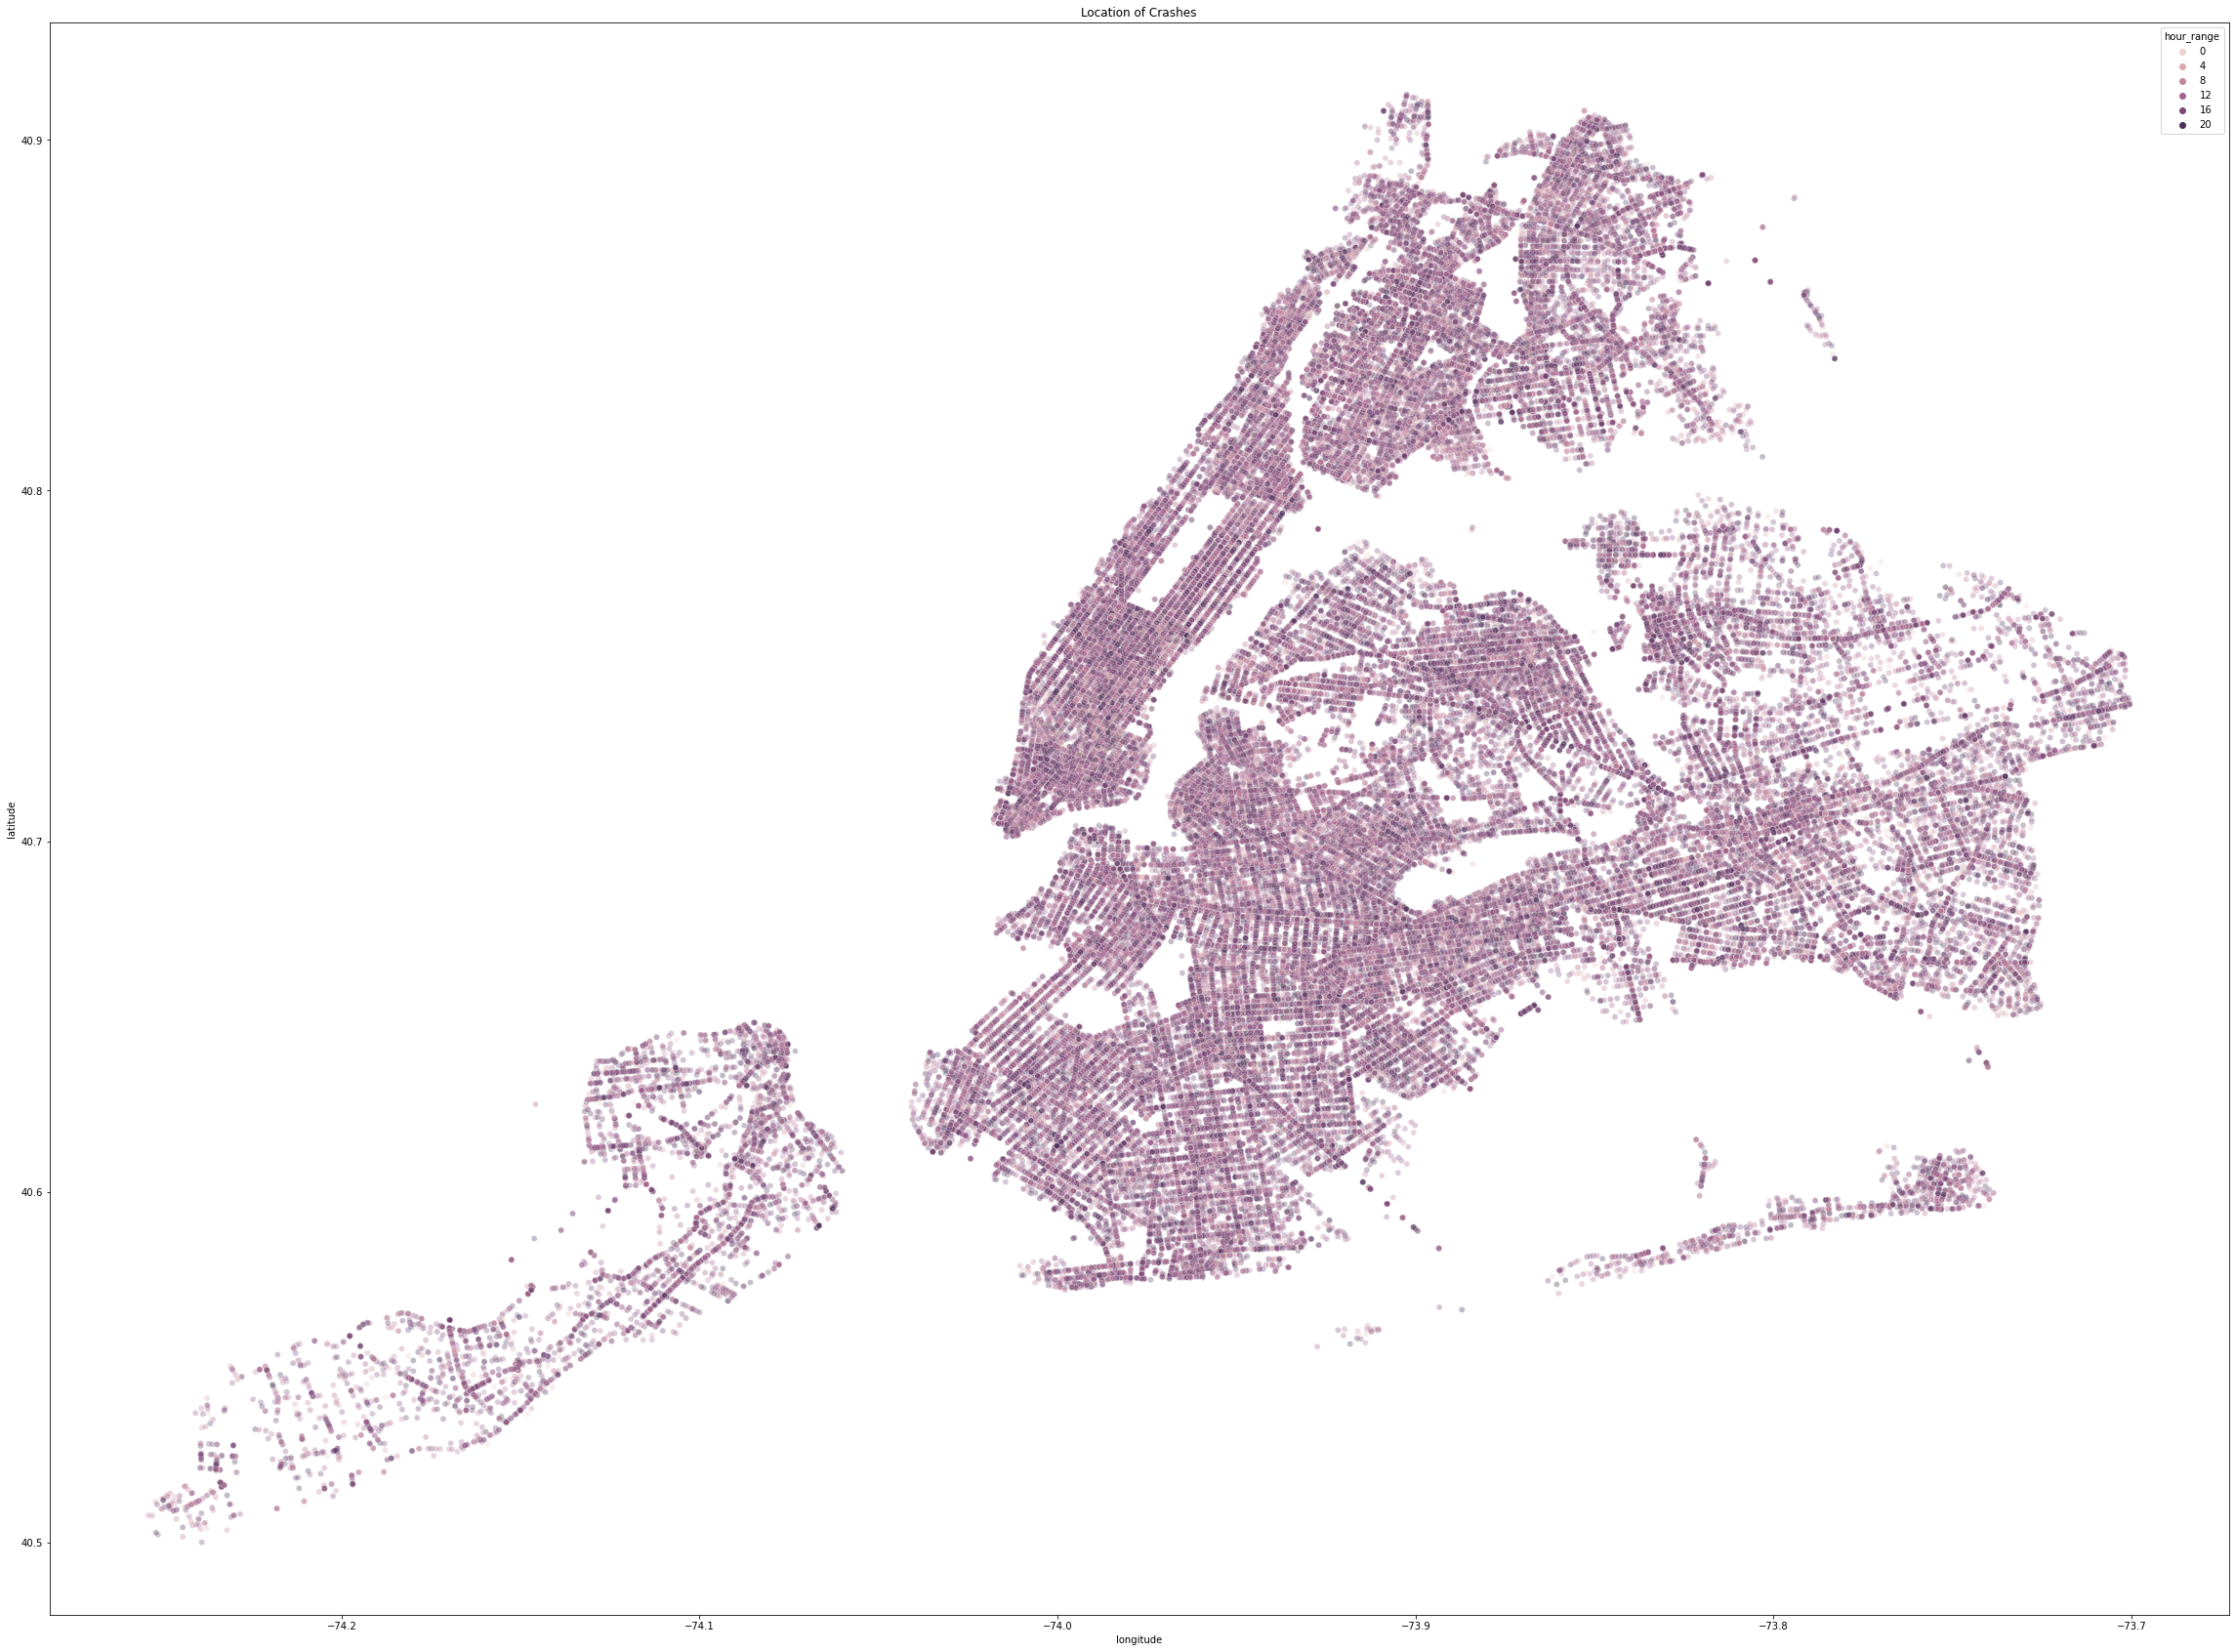

In [49]:
#Creating a map of borough through using the logitude and latitude data
AXdims = (40, 30)
fig, ax = pyplot.subplots(figsize=AXdims)
plt.title("Location of Crashes")

sns.scatterplot(data=accidents, x="longitude", y="latitude", ax=ax, alpha=0.3, hue="hour_range")

### *Insights from the graph:*
The graph utilizes the longitude and latitude columns of the datafram to map out where the accidents occur in NYC. From this density graph, our group observed that:
- Brooklyn had the most amount of accidents depite the fact that it is the second largest borough. The graph shows that Brooklyn is very dense because of this.
- Our group observed that Queens had the second most amount of accidents despite the fact that it is the largest of the 5 boroughs. In the graph we observe that queens in not as dense as compared to Brooklyn, but is still pretty dense in many areas.
- Our group observed that Manhattan has the third most amount of accidents depite the fact that it is the smallest of the 5 boroughs. The graph shows that Manhattan is very dense because of this.
- The Bronx is the fourth largest borough and it has the fourth largest amount of accidents. This graph also matches this observation, because the Bronx is semi-dense.
- Lastly, Staten Island has the least amount of accidents despite the fact that it is the third largest borough. This is why we can observe in the graph that Staten Island is not dense at all compared to the other boroughs.
- From the observations above, our group determined that the size of the borough actually only has a very small effect on the number of accidents occuring in the borough. Out of the five boroughs, only the Bronx's size correlated with its ranking in terms of the number of accidents in the borough. 
    - Our data regarding the size of the boroughs came from: https://en.wikipedia.org/wiki/Boroughs_of_New_York_City.

___
## Logistic Regression Analysis

This logistic model, using time in minutes to predict whether or not there will be an above-average number of injuries, has an accuracy of  81%.


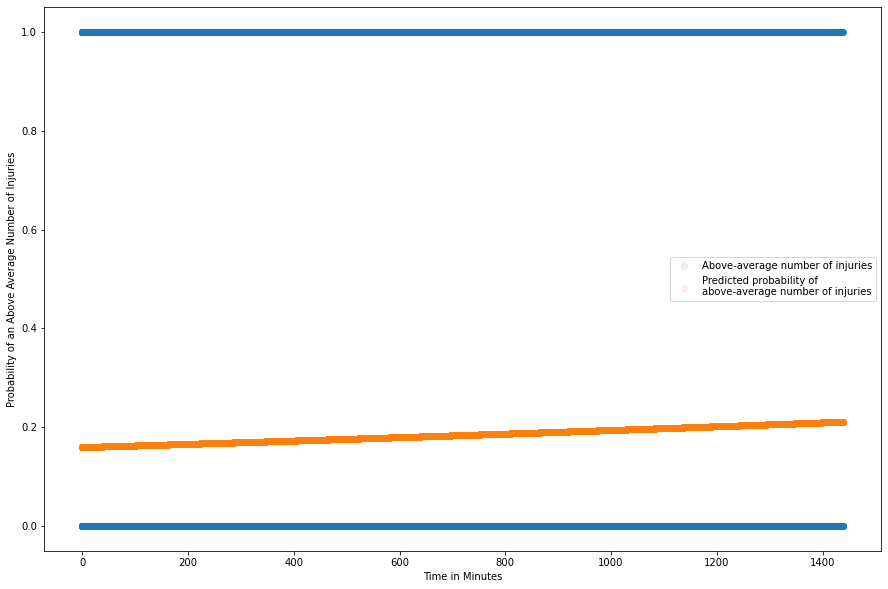

In [50]:
a_mean = accidents.injured.median()
above_avg = []
for x in accidents['injured']:
    if(x > a_mean):
        above_avg.append(1)
    else:
        above_avg.append(0)

accidents['above_avg'] = above_avg

#accidents['above_avg'] = accidents['injured'].apply(lambda x: 1 if x > accidents.injured.median() else 0)

logistic_model = LogisticRegression().fit(accidents[['minute_time']], accidents['above_avg'])
print("This logistic model, using time in minutes to predict whether or not there will be an above-average number of injuries, has an accuracy of  {:.0f}%.".format(100*logistic_model.score(accidents[['minute_time']], accidents['above_avg'])))
matplotlib.rcParams['figure.figsize'] = 15,10
plt.scatter(
    accidents.minute_time, 
    accidents.above_avg, 
    alpha=0.1,
    label='Above-average number of injuries'
)

plt.scatter(
    accidents.minute_time, 
    logistic_model.predict_proba(accidents[['minute_time']])[:,1], 
    alpha=0.1,
    label='Predicted probability of\nabove-average number of injuries'
)
plt.xlabel("Time in Minutes")
plt.ylabel("Probability of an Above Average Number of Injuries")
plt.legend()
plt.show()

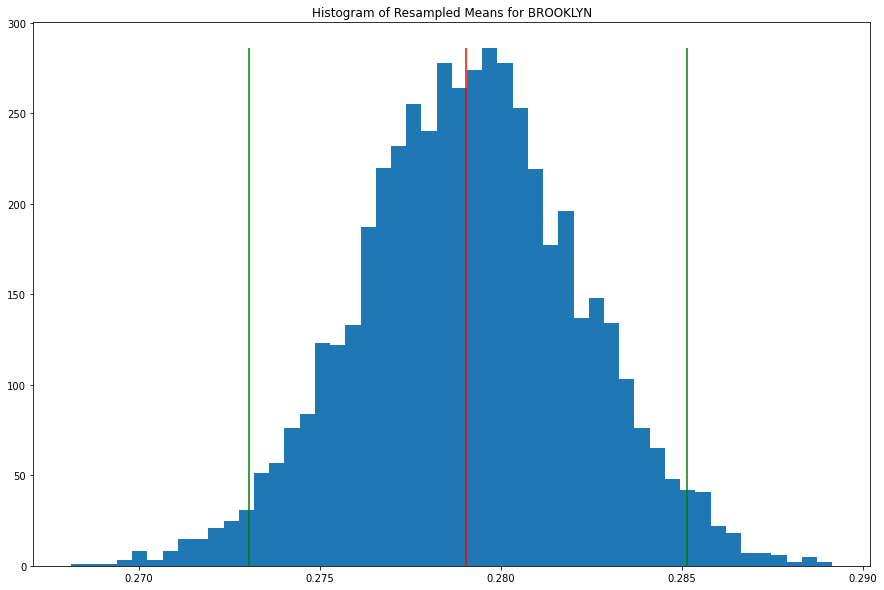

A 95% confidence interval for the mean number of injuries in BROOKLYN is [0.2730302  0.28515127]
Estimated population mean is 0.28


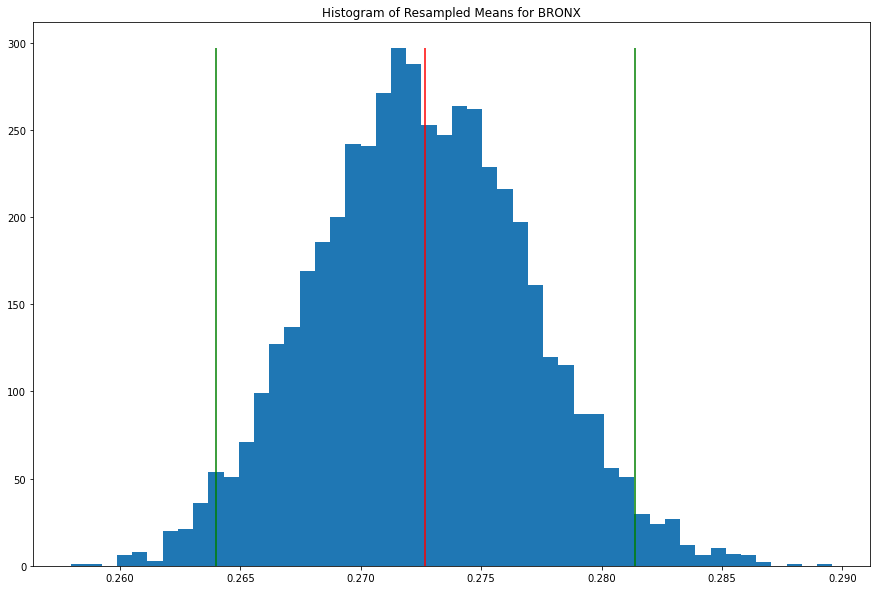

A 95% confidence interval for the mean number of injuries in BRONX is [0.26397528 0.28136918]
Estimated population mean is 0.27


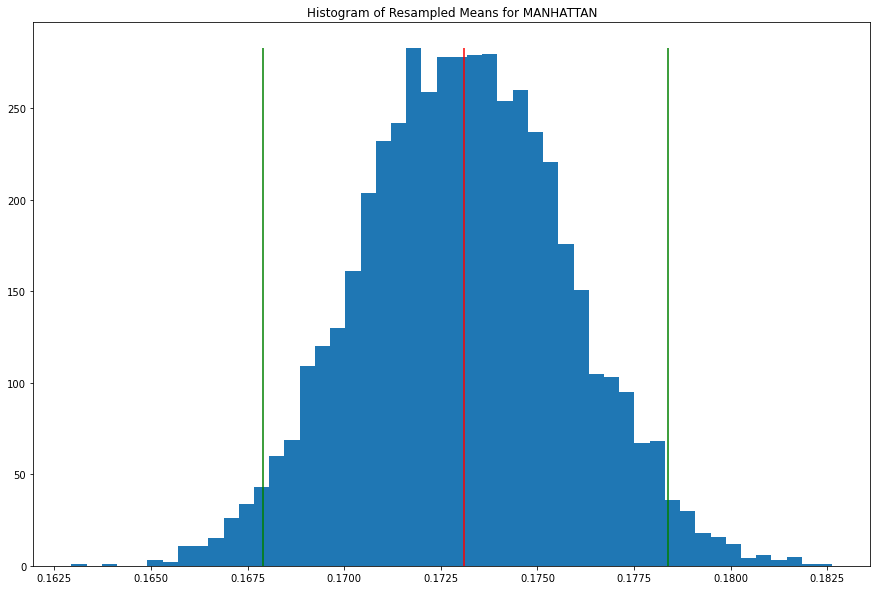

A 95% confidence interval for the mean number of injuries in MANHATTAN is [0.16788666 0.17836787]
Estimated population mean is 0.17


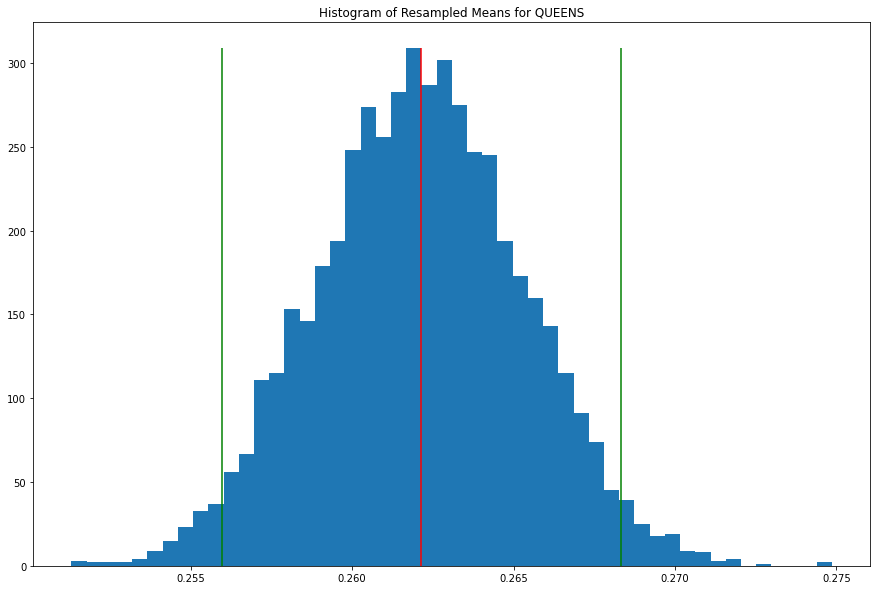

A 95% confidence interval for the mean number of injuries in QUEENS is [0.25597303 0.26831444]
Estimated population mean is 0.26


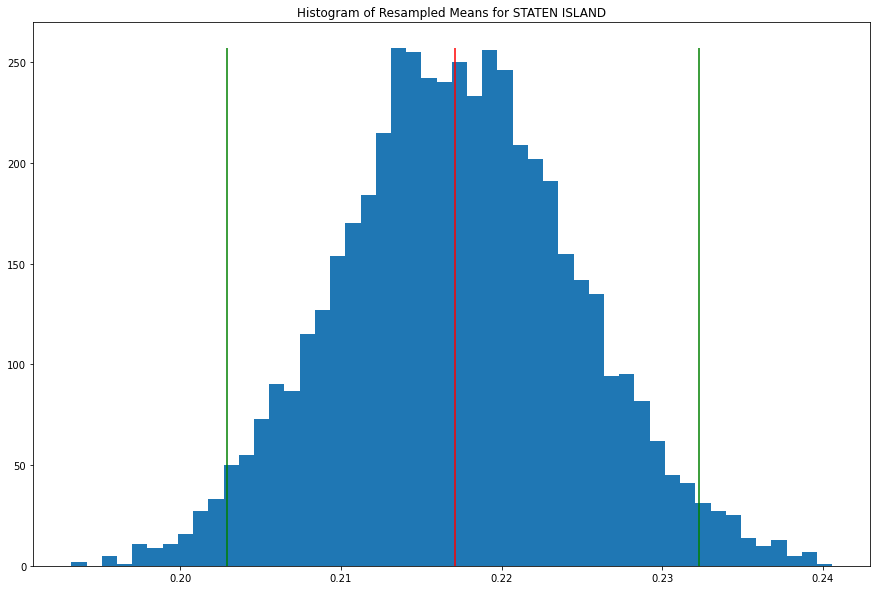

A 95% confidence interval for the mean number of injuries in STATEN ISLAND is [0.20293327 0.23225948]
Estimated population mean is 0.22


In [51]:
def bootstrap(borough):
    n_bootstrap = 5000
    bootstrap_means = np.zeros(n_bootstrap)
    for i in range(n_bootstrap):
        sample = accidents.sample(n=len(accidents), replace=True)
        borough_subset = sample.loc[accidents.borough == borough]
        est_mean = borough_subset.injured.mean()
        bootstrap_means[i] = est_mean
    binsizes, _, _ = plt.hist(bootstrap_means, bins=50)    
    plt.vlines(accidents["injured"][accidents.borough == borough].mean(), ymin=0, ymax=np.max(binsizes), color='red')
    plt.vlines(np.quantile(bootstrap_means, q=[0.025])[0], ymin=0, ymax=np.max(binsizes), color='green')
    plt.vlines(np.quantile(bootstrap_means, q=[0.975])[0], ymin=0, ymax=np.max(binsizes), color='green')
    plt.title("Histogram of Resampled Means for " + borough)
    plt.show()
    print("A 95% confidence interval for the mean number of injuries in " + b + " is {}".format(np.quantile(bootstrap_means, q=[0.025, 0.975])))
    print("Estimated population mean is {:.2f}".format(bootstrap_means.mean()))

for b in individual_boroughs:
    bootstrap(b)

## **Analysis of Bootstrap Sampling:**

>From these intervals, we can estimate that the mean number of injuries per year in each borough is 0.26 for Queens, 0.17 for Manhattan, 0.28 for Brooklyn, 0.27 for the Bronx, and 0.22 for Staten Island. 

> We can also interpret the estimated confidence intervals as a reasonable range of values we might see if we were actually to collect this data over many different years. So, for example, over the course of 10,000 years we could expect to see mean number of enjuries between 0.203 and 0.232 in Staten island




---
## Interpretation and Conclusions

After conducting our analyses, we determined that there was very small positive little correlation between time of day on accident severity. According to the linear regression analysis in sections titled "Accident Severity vs Time," with single and multiple variable analysis, while some boroughs have less accidents as a whole, the mean accident severity in each borough is roughly consistent. Despite the fact that the slope of the correlation is small, the low p-value in the ordinary least squares regression shows that the regression is strong. There are more accidents in the later parts of the day, despite this slope being close to zero. Additionally, in the graph where we explored the number of people killed in each hour of the day, we observed that there is no clear pattern in the bar graph that indicated that more people die in car accidents during one part of the day compared to another part of the day. 

Our group observed that Brooklyn had the most amount of accidents despite the fact that it is the second largest borough(this can be seen from the graph where we explore the "Accidents in each borough for an entire 24 hour period"). This graph shows us that Brooklyn leads with a total number of 41218 periods in the year of 2018. Our group observed that Queens had the second most amount of accidents despite the fact that it is the largest of the 5 boroughs. In the "Accidents in each borough for an entire 24 hour period" graph, we can observe that the total number of accidents in Queens for the year of 2018 is 41218. Our group observed that Manhattan has the third most amount of accidents despite the fact that it is the smallest of the 5 boroughs. Again observing the "Accidents in each borough for an entire 24 hour period" graph, we can see that Manhattan had a total of 31356 accidents in the year of 2018.  The Bronx is the fourth largest borough and it has the fourth largest amount of accidents. From the "Accidents in each borough for an entire 24 hour period" graph we can deduce that the total number of accidents in the Bronx for the year of 2018 was 23009. Lastly, Staten Island has the least amount of accidents despite the fact that it is the third largest borough. Once again referencing the "Accidents in each borough for an entire 24 hour period" graph, we can see that the total number of accidents in Staten Island in the year of 2018 was 6163. From the observations above, our group determined that the size of the borough actually only has a very small effect on the number of accidents occuring in the borough. Out of the five boroughs, only the Bronx's size correlated with its ranking in terms of the number of accidents in the borough.

Through the bootstrap analysis, we were able to estimate a 95% confidence interval for the mean number of injuries in each borough in a given year, which allows us to think about a reasonable range for the mean number of injuries in each borough in a given year.

When our group was analyzing whether there was a correlation between the time of day and the number of accidents that occured, we came to the conclusion that there was a correlation between the time of day and the number of accidents. In the "Accidents in the Bronx for an entire 24 hour period" graph, we can see that the minimum number of accidents occur at around 3am to 4am, while the maximum occurred at around 4pm to 5pm. In the "Accidents in the Queens for an entire 24 hour period", we can see that the minimum number of accidents also occur at around 3am to 4am, while the maximum number of accidents occur at around 5pm to 6pm. In the "Accidents in Manhattan for an entire 24 hour period" graph, our group observed that the minimum number of accidents occur at around 4am to 5am, while the maximum number of accidents occur at around 2pm to 3pm. In the "Accidents in Brooklyn for an entire 24 hour period" graph, we observe that the minimum number of accidents occur around 3am to 4am, while the maximum number of accidents occur around 4pm to 5pm. Lastly, in the "Accidents in Staten Island for an entire 24 hour period" graph, we observed that the minimum number of accidents occurred at around 3am to 4am, while the maximum number of accidents occurred at around 4pm and 5pm. When we took a step back and analyzed the "Accidents in all of the boroughs for an entire 24 hour period" graph, we observed that the minimum number of accidents occur at around 3am to 4am, while the maximum number of accidents occur at around 4pm to 5pm. After analyzing all of these graphs, our group was able to come to the conclusion that there is indeed a relationship between the time of day and the number of accidents that occur, and we also found out that this trend is the same across all 5 boroughs. The pattern that showed up in all of the bar graphs that were referenced above took on very similar shapes(the min and max occurred in roughly the same areas. Connecting this observation to the real world, in NYC from 3am to 4am is the time that most people are asleep, while 3pm to 5pm is around the time that most people get off of work. These are some factors that our group inferred that played a role in why we have seen what we saw in our data, but we acknowledge that more experimentation and analysis is needed to confirm and solidify these hypotheses.

From the graphs: "Accidents in all of the boroughs for an entire 24 hour period" graph, "Time of day and the number of people killed by hour for an entire 24 hour period" graph, and "Time of day and the number of people injured by hour for an entire 24 hour period" graph, our group found out that only the pattern between the "Accidents in all of the boroughs for an entire 24 hour period" graph and "Time of day and the number of people injured by hour for an entire 24 hour period" graph matched. This finding allowed our group to realize that the reason behind why this is the case is because most accidents result in injuries, thus the pattern for the number of injuries for each of the 24 hours closely matches the pattern for the number of accidents for each of the 24 hours. On the other hand, accidents do not necessarily result in death, thus the pattern for the number of deaths for each of the 24 hours does not match the pattern for the number of accidents for each of the 24 hours.

---

## Acknowledgements

1. https://www.nhtsa.gov/traffic-deaths-2018 Cited the statement that traffic fatalities have increased in urban centers 
2. https://medium.com/the-code-monster/split-a-dataset-into-train-and-test-datasets-using-sk-learn-acc7fd1802e0 The website helped me understand how to use train split test on a linear regression model. Used code mentioned in article as reference for linear regression between the vehicles involved and people injured/killed.

